This is a group project with team members J. Chen, F. Mota, and T. Phu. 

Boston Housing Study (Python) using data from the Boston Housing Study case as described in "Marketing Data Science: Modeling Techniques for Predictive Analytics with R and Python" (Miller 2015)

Here we use data from the Boston Housing Study to evaluate regression and tree-based modeling methods within a cross-validation design.

Program revised by Thomas W. Milller (2017/09/29)

Scikit Learn documentation for this assignment:
http://scikit-learn.org/stable/modules/model_evaluation.html 
http://scikit-learn.org/stable/modules/generated/
  sklearn.model_selection.KFold.html
http://scikit-learn.org/stable/modules/generated/
  sklearn.linear_model.LinearRegression.html
http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html
http://scikit-learn.org/stable/modules/generated/
  sklearn.linear_model.Ridge.html
http://scikit-learn.org/stable/modules/generated/
  sklearn.linear_model.Lasso.html
http://scikit-learn.org/stable/modules/generated/
  sklearn.linear_model.ElasticNet.html
http://scikit-learn.org/stable/modules/generated/
  sklearn.metrics.r2_score.html

Textbook reference materials:
Geron, A. 2017. Hands-On Machine Learning with Scikit-Learn and TensorFlow. Sebastopal, Calif.: O'Reilly. Chapter 3 Training Models has sections covering linear regression, polynomial regression, and regularized linear models. Sample code from the book is available on GitHub at https://github.com/ageron/handson-ml

In [1]:
# prepare for Python version 3x features and functions
# comment out for Python 3.x execution
# from __future__ import division, print_function
# from future_builtins import ascii, filter, hex, map, oct, zip

# seed value for random number generators to obtain reproducible results
RANDOM_SEED = 1

# although we standardize X and y variables on input,
# we will fit the intercept term in the models
# Expect fitted values to be close to zero
SET_FIT_INTERCEPT = True

# import base packages into the namespace for this program
import numpy as np
import pandas as pd

# modeling routines from Scikit Learn packages

# Assignment 4: Be sure to add decision tree and random forest packages

from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, VotingRegressor
import sklearn.linear_model
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LassoLarsIC
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics.scorer import make_scorer
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor, export_graphviz


# Let's comment out the math library. Stick with the numpy version of the function.

# from math import sqrt  # log function; sqrt for root mean-squared error calculation

# np.sqrt works on vectors and thus plays well with matplotlib
# Attempts to transform more than single numbers with math.sqrt often crash plt plots
# Speaking of plt… Here are libraries for visualizations

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import graphviz
import pydot

# Sanity check: Echo output so that we know that this critical first chunk has run successfully
print("All libraries imported. RANDOM_SEED = {:d}".format(RANDOM_SEED))

All libraries imported. RANDOM_SEED = 1


In [2]:
# read data for the Boston Housing Study
# creating data frame restdata
boston_input = pd.read_csv('boston.csv')

# check the pandas DataFrame object boston_input
print('\nboston DataFrame (first and last five rows):')
print(boston_input.head())
print(boston_input.tail())


boston DataFrame (first and last five rows):
  neighborhood     crim    zn  indus  chas    nox  rooms   age     dis  rad  \
0       Nahant  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1   
1   Swampscott  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2   
2   Swanpscott  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2   
3   Marblehead  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3   
4   Marblehead  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3   

   tax  ptratio  lstat    mv  
0  296     15.3   4.98  24.0  
1  242     17.8   9.14  21.6  
2  242     17.8   4.03  34.7  
3  222     18.7   2.94  33.4  
4  222     18.7   5.33  36.2  
    neighborhood     crim   zn  indus  chas    nox  rooms   age     dis  rad  \
501     Winthrop  0.06263  0.0  11.93     0  0.573  6.593  69.1  2.4786    1   
502     Winthrop  0.04527  0.0  11.93     0  0.573  6.120  76.7  2.2875    1   
503     Winthrop  0.06076  0.0  11.93     0  0.573  6

In [3]:
print('\nGeneral description of the boston_input DataFrame:')
print(boston_input.info())


General description of the boston_input DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
neighborhood    506 non-null object
crim            506 non-null float64
zn              506 non-null float64
indus           506 non-null float64
chas            506 non-null int64
nox             506 non-null float64
rooms           506 non-null float64
age             506 non-null float64
dis             506 non-null float64
rad             506 non-null int64
tax             506 non-null int64
ptratio         506 non-null float64
lstat           506 non-null float64
mv              506 non-null float64
dtypes: float64(10), int64(3), object(1)
memory usage: 55.4+ KB
None


In [4]:
# drop neighborhood from the data being considered
boston = boston_input.drop('neighborhood', 1)
print('\nGeneral description of the boston DataFrame:')
print(boston.info())


General description of the boston DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rooms      506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
lstat      506 non-null float64
mv         506 non-null float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB
None


In [5]:
print('\nDescriptive statistics of the boston DataFrame:')
print(boston.describe())


Descriptive statistics of the boston DataFrame:
             crim          zn       indus        chas         nox       rooms  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677082   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio       lstat  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.

In [6]:
# set up preliminary data for data for fitting the models 
# the first column is the median housing value response
# the remaining columns are the explanatory variables
prelim_model_data = np.array([boston.mv,\
    boston.crim,\
    boston.zn,\
    boston.indus,\
    boston.chas,\
    boston.nox,\
    boston.rooms,\
    boston.age,\
    boston.dis,\
    boston.rad,\
    boston.tax,\
    boston.ptratio,\
    boston.lstat]).T

# dimensions of the polynomial model X input and y response
# preliminary data before standardization
print('\nData dimensions:', prelim_model_data.shape)


Data dimensions: (506, 13)


In [7]:
# standard scores for the columns... along axis 0
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(prelim_model_data))
# show standardization constants being employed
print(scaler.mean_)
print(scaler.scale_)

StandardScaler(copy=True, with_mean=True, with_std=True)
[2.25288538e+01 3.61352356e+00 1.13636364e+01 1.11367787e+01
 6.91699605e-02 5.54695059e-01 6.28463439e+00 6.85749012e+01
 3.79504269e+00 9.54940711e+00 4.08237154e+02 1.84555336e+01
 1.26530632e+01]
[9.17309810e+00 8.59304135e+00 2.32993957e+01 6.85357058e+00
 2.53742935e-01 1.15763115e-01 7.01922514e-01 2.81210326e+01
 2.10362836e+00 8.69865112e+00 1.68370495e+02 2.16280519e+00
 7.13400164e+00]


In [8]:
# the model data will be standardized form of preliminary model data
model_data = scaler.fit_transform(prelim_model_data)

# dimensions of the polynomial model X input and y response
# all in standardized units of measure
print('\nDimensions for model_data:', model_data.shape)


Dimensions for model_data: (506, 13)


In [9]:
# Set up an alternative dataset using the *log* median value of homes
# CAREFUL: Reserve the use of this version of the data till the very end …
#   … and only AFTER exhausting all uses of the standard dataset, model_data
# Rationale: Avoid contaminating the regression models and their derivative methods and attributes
# We should deliver a complete report on the regular data before playing with the log-transformed data
# It will become apparent that thre is really no need to log-transform the Boston housing study's data

logboston = boston.copy()
logboston.loc[:, "logmv"] = pd.Series(np.log(boston.mv), index = logboston.index)
print('\nGeneral description of the alternative logboston DataFrame:')
print(logboston.info())


General description of the alternative logboston DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rooms      506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
lstat      506 non-null float64
mv         506 non-null float64
logmv      506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB
None


In [10]:
print('\nDescriptive statistics of the logboston DataFrame:')
logboston.describe()


Descriptive statistics of the logboston DataFrame:


,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat,mv,logmv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.528854,3.034558
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.182176,0.408275
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000,1.609438
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000,2.834680
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000,3.054001
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000,3.218876
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000,3.912023


In [11]:
# set up preliminary data for data for fitting the models 
# the first column is the median housing value response
# the remaining columns are the explanatory variables
prelim_log_model_data = np.array([logboston.logmv,\
    logboston.crim,\
    logboston.zn,\
    logboston.indus,\
    logboston.chas,\
    logboston.nox,\
    logboston.rooms,\
    logboston.age,\
    logboston.dis,\
    logboston.rad,\
    logboston.tax,\
    logboston.ptratio,\
    logboston.lstat]).T

# dimensions of the polynomial model X input and y response
# preliminary data before standardization
print('\nData dimensions:', prelim_log_model_data.shape)


Data dimensions: (506, 13)


In [12]:
# standard scores for the columns... along axis 0
from sklearn.preprocessing import StandardScaler
scaler1 = StandardScaler()
print(scaler1.fit(prelim_log_model_data))
# show standardization constants being employed
print(scaler1.mean_)
print(scaler1.scale_)

StandardScaler(copy=True, with_mean=True, with_std=True)
[3.03455800e+00 3.61352356e+00 1.13636364e+01 1.11367787e+01
 6.91699605e-02 5.54695059e-01 6.28463439e+00 6.85749012e+01
 3.79504269e+00 9.54940711e+00 4.08237154e+02 1.84555336e+01
 1.26530632e+01]
[4.07871084e-01 8.59304135e+00 2.32993957e+01 6.85357058e+00
 2.53742935e-01 1.15763115e-01 7.01922514e-01 2.81210326e+01
 2.10362836e+00 8.69865112e+00 1.68370495e+02 2.16280519e+00
 7.13400164e+00]


In [13]:
# the *log* model data will be standardized form of preliminary *log* model data
log_model_data = scaler1.fit_transform(prelim_log_model_data)

# dimensions of the polynomial model X input and y response
# all in standardized units of measure
print('\nDimensions for log_model_data:', log_model_data.shape)


Dimensions for log_model_data: (506, 13)


All of the foregoing code, which came directly from jumpstart code for this exercise or was adapted from the jumpstart code, has reshaped and standardized the Boston housing study. We have used the original dataset and the jumpstart code to prepare a second set of data, which treats natural log-transformed median home prices as the response variable of interest.

We now turn to the actual elaboration of models involving decision trees and ensemble methods based upon them: trees, bagging, random forests, extreme trees, AdaBoost, gradient boosting regression (including its stochastic variant), and voting regressors. The ultimate goal, as with linear models, is to evaluate each model's performance according to root mean-squared error (RMSE) as an index of prediction error. We retain enough of the linear models from Assignment 3 so that we may compare the new methods to OLS regression and its regularized variants.

Because many of these methods, unless properly tuned, are extremely vulnerable to overfitting, we engage in extensive optimization of hyperparameters. Those hyperparameters include maximum depth, maximum features, the number of estimators, the learning rate, and subsample proportion. Our primary tools for optimization are GridSearchCV and Pipeline. We also use techniques unique to certain models, such as .staged_predict().

The diversity of optimization techniques inspired what we hope is a useful and diverse range of visualization tools.

Our final tests will directly pit each model, adjusted as appropriate by its optimal hyperparameter(s), on two measures of prediction error: RMSE and r². Our results favor all of the ensemble methods over ordinary linear regression model in predictive accuracy. The voting regressor combining the five major ensemble methods — random forest, extra trees, AdaBoost, and both regular and stochastic gradient boosting — fares best. That is consistent with the "wisdom of crowds" underlying ensemble methods generally.

We recommend these models, including a voting-based aggregation if time permits, in favor of any form of linear regression. There may be some loss in interpretability as we move from "white box" to "black box" machine-learning models. But the gain in predictive accuracy is so impressive that we counsel reliance on these tree, forest, and ensemble methods.

In [14]:
# Great. We now have both the basic model_data and its log-transformed alternative, log_model_data
# Let's split each of the datasets into features and target

model_features = model_data[:, 1:]
model_target = model_data[:, 0]
log_model_features = log_model_data[:, 1:]
log_model_target = log_model_data[:, 0]

# Sanity check: Echo a message indicating that the data have been appropriately split into features and target
print("Model data and log-transformed model data have been split between feature and target variables.")

Model data and log-transformed model data have been split between feature and target variables.


In [15]:
# The splitting of data into training and test sets need not take place more than once
# Do it here, and then dispense with this step in other GridSearchCV() rounds

features_train, features_test, target_train, target_test = train_test_split(model_features, model_target,
                                                                            test_size = 0.2,
                                                                            random_state = RANDOM_SEED)


# The next line is *VERY IMPORTANT*. It defines the negative mean squared error test we'll use as our scorer

negative_mse_scorer = make_scorer(mean_squared_error, greater_is_better = False)


# As a further sanity check, echo a message indicating that we now have training and test sets
print("Moreover, the basic, non-transformed data have beel split into training and test sets.")
print("This step need not be repeated.\n")
print("This code chunk also implements the negative_mse_scorer as the default scorer for this study.")
print("That is an important step. We take it here, alongside our splitting of training and test data sets.\n")
print("We have also re-run all linear models according to the new neg_mse_scorer.")
print("Without staging those tests, we will recalibrate our linear models and include them here for comparison.")

Moreover, the basic, non-transformed data have beel split into training and test sets.
This step need not be repeated.

This code chunk also implements the negative_mse_scorer as the default scorer for this study.
That is an important step. We take it here, alongside our splitting of training and test data sets.

We have also re-run all linear models according to the new neg_mse_scorer.
Without staging those tests, we will recalibrate our linear models and include them here for comparison.


Summary of linear models from Assignment 3:

Instead of repeating nearly 40 cells of code, we will summarize the results of our study of linear models. We have revised the relevant hyperparameters in harmony with our new neg_mse_scorer to ensure a direct, apples-to-apples comparison of linear and tree-based/ensemble models.

In [16]:
# This is an *EXCEPTIONALLY IMPORTANT* block of code
# (Re)define each of the regularized models in light of the hyperparamters reported by GridSearchCV and AIC/BIC

ITERATIONS = 1000 # Reducing from 20000 despite small values of alpha, because we will forgo learning curves

# Manually recording these hyperparameters from a separate (re)run of Assignment 3 code to streamline analysis

ridge_alpha = 2.14
lasso_alpha = 0.0029
aic_alpha = 0.0001056524809406
bic_alpha = 0.004027254732273
elastic_net_alpha = 0.002906761084087594
elastic_net_l1_ratio = 0.99
elastic_net_alpha2 = 0.00441245295904585
elastic_net_l1_ratio2 = 0.62

lin_reg = LinearRegression()
ridge_reg = Ridge(alpha = ridge_alpha, solver = "cholesky")
lasso_reg = Lasso(alpha = lasso_alpha, max_iter = ITERATIONS)
lasso_reg_aic = Lasso(alpha = aic_alpha, max_iter = ITERATIONS)
lasso_reg_bic = Lasso(alpha = bic_alpha, max_iter = ITERATIONS)
elastic_net = ElasticNet(alpha = elastic_net_alpha, l1_ratio = elastic_net_l1_ratio, max_iter = ITERATIONS)
elastic_net2 = ElasticNet(alpha = elastic_net_alpha2, l1_ratio = elastic_net_l1_ratio2, max_iter = ITERATIONS)

regression_models = [[lin_reg, "Linear regression", "lin_reg"], [ridge_reg, "Ridge regression", "ridge_reg"], 
                     [lasso_reg, "Lasso regression", "lasso_reg"],
                     [lasso_reg_aic, "Lasso regression/AIC", "lasso_reg_aic"],
                     [lasso_reg_bic, "Lasso regression/BIC", "lasso_reg_bic"],
                     [elastic_net, "ElasticNet", "elastic_net"],
                     [elastic_net2, "ElasticNet2", "elastic_net2"]]

hyperparameters = {ridge_reg: ridge_alpha, lasso_reg: lasso_alpha, lasso_reg_aic: aic_alpha,
                   lasso_reg_bic: bic_alpha, elastic_net: [elastic_net_alpha, elastic_net_l1_ratio],
                   elastic_net2: [elastic_net_alpha2, elastic_net_l1_ratio2]}

# Sanity check: Echo a message indicating successful completion of this step
# Report each of the models and its appopriate hyperparameter(s)

print("*** Specification of optimized regression models ***\n")
print("The linear regression model has defined anew.")
print("Regularized models ridge, lasso, and ElasticNet have been defined, according to optimized hyperparameters.\n")

# print(hyperparameters["lasso_reg"])

print("{:>20}\t{:>8}\t{:>8}".format("Model", "Alpha", "l1 ratio"))
for reg_model, model_label, file_name in regression_models:
    print("{:>20}\t".format(model_label), end = "")
    if reg_model != lin_reg and reg_model != elastic_net and reg_model != elastic_net2:
        print("{:8.6f}\t".format(hyperparameters[reg_model]), end = "")
    elif reg_model == elastic_net or reg_model == elastic_net2:
        print("{:8.6f}\t{:8.6f}".format(hyperparameters[reg_model][0], hyperparameters[reg_model][1]), end = "")
    print("")

*** Specification of optimized regression models ***

The linear regression model has defined anew.
Regularized models ridge, lasso, and ElasticNet have been defined, according to optimized hyperparameters.

               Model	   Alpha	l1 ratio
   Linear regression	
    Ridge regression	2.140000	
    Lasso regression	0.002900	
Lasso regression/AIC	0.000106	
Lasso regression/BIC	0.004027	
          ElasticNet	0.002907	0.990000
         ElasticNet2	0.004412	0.620000


In [17]:
# Compare the RMSE and r² for the linear regression, ridge, lasso (3x), and ElasticNet (2x) models
# Start by defining a function to return each score by model
# Then print it in a pseudo-report format
# We could create a pandas DataFrame, but that adds complications and diminishes the simplicity of this information

def rmse_r2(model):
    model.fit(features_train, target_train)
    benchmark = target_test
    predictions = model.predict(features_test)
    mse = mean_squared_error(benchmark, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(benchmark, predictions)
    return (rmse, r2)

winning_model = lin_reg
winning_label = "Linear regression"
winning_rmse = rmse_r2(lin_reg)[0]

print("*** Model scoring: Performance according to RMSE and r² ***\n")
print("{:>20}\t{:>10}\t{:>10}".format("Model", "RMSE", "r²"))
for scoring_model, model_label, file_name in regression_models:
    this_rmse = rmse_r2(scoring_model)[0]
    this_r2 = rmse_r2(scoring_model)[1]
    print("{:>20}\t{:>10.6f}\t{:>10.6f}".format(model_label, this_rmse, this_r2))
    if this_rmse < winning_rmse:
        winning_model = scoring_model
        winning_rmse = this_rmse
        winning_label = model_label

print("\n{} is the best-performing model, with a winning (lowest) RMSE score of {:.6f}.".format(winning_label, winning_rmse))
if winning_model != lin_reg:
    print("This represents a reduction in RMSE of {:.6f} relative to linear regression.".format(rmse_r2(lin_reg)[0] - winning_rmse))
else:
    print("No form of regularization evaluated here improves upon the performance of linear regression.")

*** Model scoring: Performance according to RMSE and r² ***

               Model	      RMSE	        r²
   Linear regression	  0.539679	  0.752015
    Ridge regression	  0.539794	  0.751909
    Lasso regression	  0.540633	  0.751137
Lasso regression/AIC	  0.539691	  0.752003
Lasso regression/BIC	  0.541308	  0.750516
          ElasticNet	  0.540624	  0.751145
         ElasticNet2	  0.540691	  0.751084

Linear regression is the best-performing model, with a winning (lowest) RMSE score of 0.539679.
No form of regularization evaluated here improves upon the performance of linear regression.


In [18]:
# Start by creating the dataframe index and column names
# Then populate the dataframe with intercept and coefficients

frame_index = ["intercept"]
for column in range(len(boston.columns) - 1):
    frame_index += [boston.columns[column]]

frame_columns = []
for reg_model, model_label, file_name in regression_models:
    frame_columns += [file_name]
    # frame_columns += [model_label]  # A more legible alternative, which we'll forgo in light of the next cells

model_frame = pd.DataFrame(np.zeros(len(frame_index) * len(frame_columns)).reshape(len(frame_index), len(frame_columns)), 
                          index = frame_index, columns = frame_columns)

for reg_model, model_label, file_name in regression_models:
    model_column = [reg_model.intercept_]
    for coefficient in range(len(reg_model.coef_)):
        model_column += [reg_model.coef_[coefficient]]
    model_frame[file_name] = model_column

model_frame

,lin_reg,ridge_reg,lasso_reg,lasso_reg_aic,lasso_reg_bic,elastic_net,elastic_net2
intercept,0.005682,0.005939,0.006339,0.005713,0.006543,0.006336,0.006354
crim,-0.110122,-0.107917,-0.102138,-0.109839,-0.098984,-0.102189,-0.101952
zn,0.152830,0.146706,0.137540,0.152210,0.132085,0.137620,0.136765
indus,0.011483,0.004805,-0.000000,0.010470,-0.000000,-0.000000,-0.000000
chas,0.062089,0.062949,0.062096,0.062113,0.061915,0.062103,0.062284
nox,-0.255906,-0.247336,-0.236323,-0.255012,-0.230074,-0.236412,-0.235238
rooms,0.228231,0.231589,0.234591,0.228434,0.237262,0.234557,0.235261
age,0.018810,0.016328,0.006017,0.018330,0.001180,0.006102,0.006082
dis,-0.355687,-0.346317,-0.339273,-0.355194,-0.332113,-0.339359,-0.337129
rad,0.270799,0.249596,0.219661,0.268685,0.201707,0.219927,0.217200


In [19]:
# Descending sort of features, as valued by the default/zero-bias linear regression model

model_frame.sort_values(by = "lin_reg", ascending = False)

,lin_reg,ridge_reg,lasso_reg,lasso_reg_aic,lasso_reg_bic,elastic_net,elastic_net2
rad,0.270799,0.249596,0.219661,0.268685,0.201707,0.219927,0.217200
rooms,0.228231,0.231589,0.234591,0.228434,0.237262,0.234557,0.235261
zn,0.152830,0.146706,0.137540,0.152210,0.132085,0.137620,0.136765
chas,0.062089,0.062949,0.062096,0.062113,0.061915,0.062103,0.062284
age,0.018810,0.016328,0.006017,0.018330,0.001180,0.006102,0.006082
indus,0.011483,0.004805,-0.000000,0.010470,-0.000000,-0.000000,-0.000000
intercept,0.005682,0.005939,0.006339,0.005713,0.006543,0.006336,0.006354
crim,-0.110122,-0.107917,-0.102138,-0.109839,-0.098984,-0.102189,-0.101952
tax,-0.216736,-0.196965,-0.170237,-0.214637,-0.155236,-0.170463,-0.168324
ptratio,-0.220341,-0.218352,-0.215901,-0.220123,-0.214599,-0.215919,-0.215671


In [20]:
# Extract a series consisting solely of absolute values of linear regression coefficients
# This series will prove useful in comparing linear regression to feature importances in trees and ensembles

model_frame["lin_reg"][model_frame.index != "intercept"].map(abs)

crim       0.110122
zn         0.152830
indus      0.011483
chas       0.062089
nox        0.255906
rooms      0.228231
age        0.018810
dis        0.355687
rad        0.270799
tax        0.216736
ptratio    0.220341
lstat      0.444702
Name: lin_reg, dtype: float64

*** Trees, forests, ensembles, and voting regressors ***

We now come to the primary business of Assignment 4, evaluating tree, forest, and ensemble methods. We start with decision tree models.

In [21]:
# Use GridSearchCV() to evaluate decision tree models

param_grid = {"max_depth": range(1, model_data.shape[1] - 1)}

grid_search_tree = GridSearchCV(DecisionTreeRegressor(random_state = RANDOM_SEED), param_grid, cv = 5,
                                return_train_score = True, scoring = negative_mse_scorer, iid = False)

# Let's add iid = False to all GridSearchCV() commands to avoid the iid deprecation warning

grid_search_tree.fit(features_train, target_train)
print("Best parameter:\t{}".format(grid_search_tree.best_params_))
print("Best cv score:\t{:.6f}".format(grid_search_tree.best_score_))
print("Test set score:\t{:6f}".format(grid_search_tree.score(features_test, target_test)))

# Save the optimal value of max_depth for the 
tree_depth = grid_search_tree.best_params_["max_depth"]

Best parameter:	{'max_depth': 4}
Best cv score:	-0.197565
Test set score:	-0.169709


In [22]:
# Let's implement and visualize the simple decision tree model chosen by GridSearchCV()

tree = DecisionTreeRegressor(max_depth = tree_depth, random_state = RANDOM_SEED)
tree.fit(features_train, target_train)
print("Training set score:\t{:.6f}".format(tree.score(features_train, target_train)))
print("Test set score:\t\t{:6f}".format(tree.score(features_test, target_test)))

Training set score:	0.891805
Test set score:		0.855502


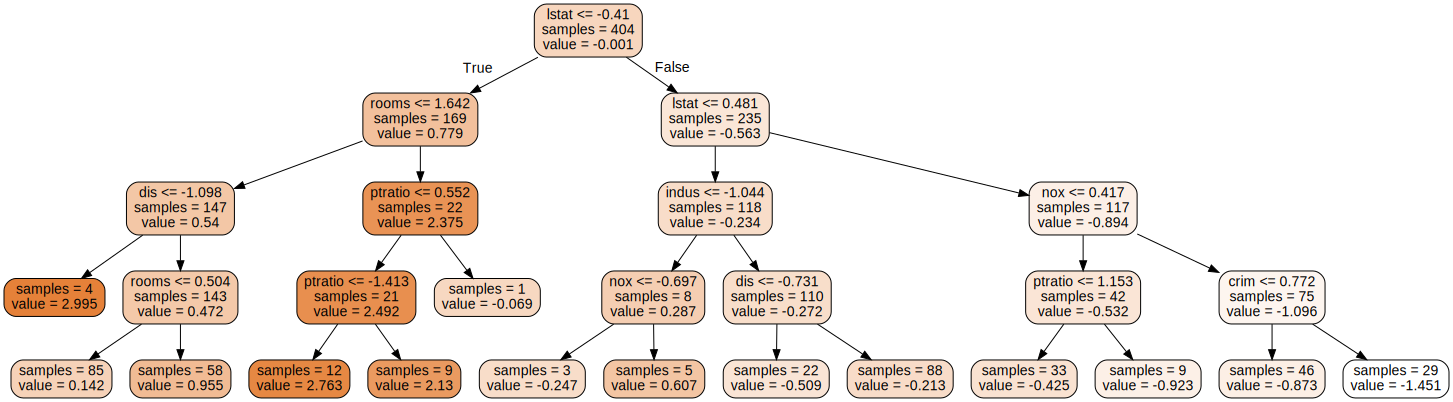

In [23]:
# Visualize the decision tree

tree_features = boston.columns[0: len(boston.columns) - 1]

# Code via Müller & Guido, p. 78
    
export_graphviz(tree, out_file=("tree.dot"), feature_names = tree_features, impurity = False, filled = True,
                rounded = True)

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

# Code for saving the .dot file in png and pdf form
# https://stackoverflow.com/questions/5316206/converting-dot-to-png-in-python

(graph,) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree.png')
graph.write_pdf('tree.pdf')

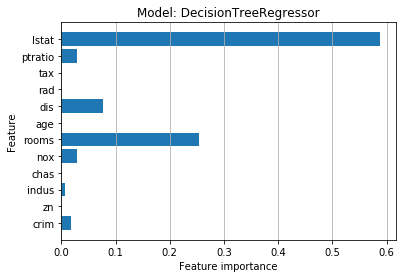

In [24]:
# Plot feature importances
# Code via Müller & Guido, pp. 79-80

def plot_feature_importances(model, feature_names, file_name):
    n_features = len(model.feature_importances_)
    plt.barh(np.arange(n_features), model.feature_importances_, align = "center")
    plt.title("Model: " + str(model).partition("(")[0])
    plt.yticks(np.arange(n_features), feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    plt.grid(True, axis = "x")
    plt.savefig(file_name + "_feature_importances.png")
    plt.savefig(file_name + "_feature_importances.pdf")

plot_feature_importances(tree, tree_features, "tree")

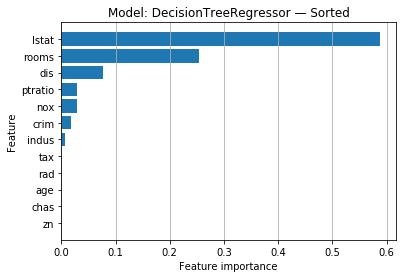

In [25]:
# Plot *sorted* feature importances
# Code adapted freely from https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html#sphx-glr-auto-examples-ensemble-plot-gradient-boosting-regression-py

def plot_sorted_feature_importances(model, feature_names, file_name):
    n_features = len(model.feature_importances_)
    importance = model.feature_importances_
    # importance = 100.0 * (importance / importance.max())
    sorted_index = np.argsort(importance)
    position = np.arange(sorted_index.shape[0])
    plt.barh(position, importance[sorted_index], align = "center")
    plt.title("Model: " + str(model).partition("(")[0] + " — Sorted")
    plt.yticks(position, feature_names[sorted_index])
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    plt.grid(True, axis = "x")
    plt.savefig(file_name + "_sorted_feature_importances.png")
    plt.savefig(file_name + "_sorted_feature_importances.pdf")

plot_sorted_feature_importances(tree, tree_features, "tree")

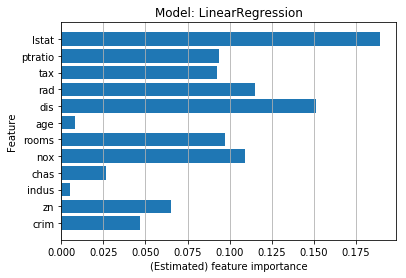

In [26]:
# Let's compare the feature importances in these tree-based models with those of linear regression
# Extract the coefficients from the linear regression model and scale them appropriately
# Take their absolute values, and then scale them so that their sum = 1

lin_reg_weights = sum(model_frame["lin_reg"][model_frame.index != "intercept"].map(abs))
lin_reg_features = model_frame["lin_reg"][model_frame.index != "intercept"].map(lambda x: abs(x) / lin_reg_weights)

n_features = len(lin_reg_features)
plt.barh(np.arange(n_features), lin_reg_features, align = "center")
plt.title("Model: LinearRegression")
plt.yticks(np.arange(n_features), tree_features)
plt.xlabel("(Estimated) feature importance")
plt.ylabel("Feature")
plt.ylim(-1, n_features)
plt.grid(True, axis = "x")
plt.savefig("lin_reg_feature_importances.png")
plt.savefig("lin_reg_feature_importances.pdf")

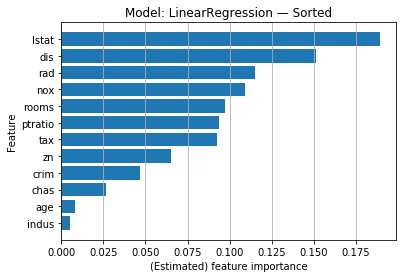

In [27]:
# Now sort the estimated weights of the linear regression model

sorted_index = np.argsort(lin_reg_features)
position = np.arange(sorted_index.shape[0])
plt.barh(position, lin_reg_features[sorted_index], align = "center")
plt.title("Model: LinearRegression — Sorted")
plt.yticks(np.arange(n_features), tree_features[sorted_index])
plt.xlabel("(Estimated) feature importance")
plt.ylabel("Feature")
plt.ylim(-1, n_features)
plt.grid(True, axis = "x")
plt.savefig("lin_reg_sorted_feature_importances.png")
plt.savefig("lin_reg__sortedfeature_importances.pdf")

In [28]:
# An obvious way to improve the performance of a basic decision tree is bagging
# Let's try the BaggingRegressor() method

# Let's implement and visualize the simple decision tree model chosen by GridSearchCV()

bag_tree = BaggingRegressor(DecisionTreeRegressor(max_depth = tree_depth, random_state = RANDOM_SEED),
                            n_estimators = 5 * len(target_train), max_samples = len(target_train),
                            bootstrap = True, n_jobs = -1, random_state = RANDOM_SEED, oob_score = True)
bag_tree.fit(features_train, target_train)

print("Quantifying the impact of bagging on decision tree performance:\n")
print("{:>20}\t{:>15}\t{:>10}".format("", "Decision tree", "Bagging"))
print("{:>20}\t{:15.6f}\t{:10.6f}".format("Training set score:", tree.score(features_train, target_train),
                                          bag_tree.score(features_train, target_train)))
print("{:>20}\t{:15.6f}\t{:10.6f}".format("Test set score:", tree.score(features_test, target_test),
                                          bag_tree.score(features_test, target_test)))
print("{:>20}\t{:15}\t{:10.6f}".format("Out-of-bag score:", "", bag_tree.oob_score_))

Quantifying the impact of bagging on decision tree performance:

                    	  Decision tree	   Bagging
 Training set score:	       0.891805	  0.921802
     Test set score:	       0.855502	  0.892589
   Out-of-bag score:	               	  0.857538


In [29]:
# Random Forest Regressor!

# Use GridSearchCV() to evaluate random forest regressors

param_grid = {"max_features": range(1, model_data.shape[1]), "max_depth": range(1, model_data.shape[1])}

grid_search_forest = GridSearchCV(RandomForestRegressor(random_state = RANDOM_SEED, n_estimators = 100),
                                  param_grid, cv = 5, return_train_score = True, scoring = negative_mse_scorer,
                                  iid = False)
grid_search_forest.fit(features_train, target_train)
print("Best parameter:\t{}".format(grid_search_forest.best_params_))
print("Best cv score:\t{:.6f}".format(grid_search_forest.best_score_))
print("Test set score:\t{:6f}".format(grid_search_forest.score(features_test, target_test)))

# Save the optimal value of the parameters for the random forest regressor
forest_depth = grid_search_forest.best_params_["max_depth"]
forest_features = grid_search_forest.best_params_["max_features"]

Best parameter:	{'max_depth': 12, 'max_features': 11}
Best cv score:	-0.114902
Test set score:	-0.109014


In [30]:
# Transfer GridSearchCV() results for Random Forest Regressor to a pandas DataFrame

forest_grid_search_results = pd.DataFrame(grid_search_forest.cv_results_)
forest_grid_search_results.loc[:, ["rank_test_score", "param_max_depth", "param_max_features", "mean_test_score", "std_test_score"]].sort_values(by = "rank_test_score").head(12)

,rank_test_score,param_max_depth,param_max_features,mean_test_score,std_test_score
142,1,12,11,-0.114902,0.010389
131,2,11,12,-0.114941,0.010643
143,3,12,12,-0.115093,0.012276
138,4,12,7,-0.115108,0.014024
119,5,10,12,-0.115584,0.009878
95,6,8,12,-0.115748,0.010741
139,7,12,8,-0.115851,0.011783
107,8,9,12,-0.116100,0.010712
127,9,11,8,-0.116138,0.014313
114,10,10,7,-0.116456,0.015450


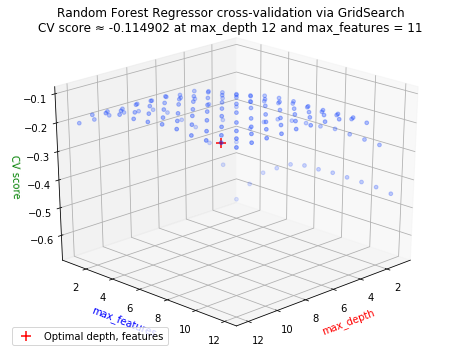

In [31]:
# Plot the optimization of Random Forest Regressors in 3D

fig = plt.figure(figsize = (8, 6.25))
ax = fig.gca(projection='3d')

plot3d_title = "Random Forest Regressor cross-validation via GridSearch\n"
plot3d_title += "CV score ≈ " + str(round(grid_search_forest.best_score_, 6))
plot3d_title += " at max_depth " + str(forest_depth) + " and max_features = " + str(forest_features)

ax.set_title(plot3d_title)
ax.set_xlabel("max_depth", color = "r")
ax.set_ylabel("max_features", color = "b")
ax.set_zlabel("CV score", color = "g")
ax.scatter(forest_grid_search_results["param_max_depth"], forest_grid_search_results["param_max_features"],
           forest_grid_search_results["mean_test_score"], s = 14, color = "#0033ff66")
ax.scatter(forest_depth, forest_features, grid_search_forest.best_score_, s = 84, marker = "+",
           color = "#ff0000ff", label = "Optimal depth, features")
ax.legend(loc = "lower left")
ax.view_init(25, 45)
plt.savefig("forest_hyperparameters.png")
plt.savefig("forest_hyperparameters.pdf")

In [32]:
# Let's implement the Random Forest Regressor model chosen by GridSearchCV()

forest = RandomForestRegressor(max_depth = forest_depth, max_features = forest_features, n_estimators = 1000, random_state = RANDOM_SEED)
forest.fit(features_train, target_train)
print("Training set score:\t{:.6f}".format(forest.score(features_train, target_train)))
print("Test set score:\t\t{:6f}".format(forest.score(features_test, target_test)))

Training set score:	0.983510
Test set score:		0.911378


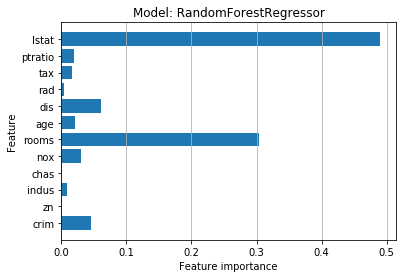

In [33]:
plot_feature_importances(forest, tree_features, "forest")

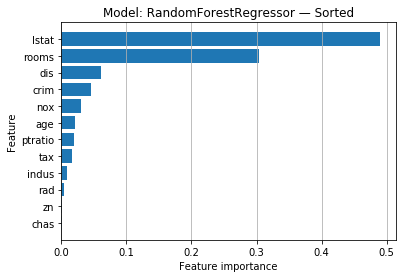

In [34]:
plot_sorted_feature_importances(forest, tree_features, "forest")

In [35]:
# Extra Trees Regressor!

# Use GridSearchCV() to evaluate Extra Trees

param_grid = {"max_features": range(1, model_data.shape[1]), "max_depth": range(1, model_data.shape[1])}

grid_search_extra_trees = GridSearchCV(ExtraTreesRegressor(random_state = RANDOM_SEED, n_estimators = 100),
                                       param_grid, cv = 5, return_train_score = True, iid = False,
                                       scoring = negative_mse_scorer)
grid_search_extra_trees.fit(features_train, target_train)
print("Best parameter:\t{}".format(grid_search_extra_trees.best_params_))
print("Best cv score:\t{:.6f}".format(grid_search_extra_trees.best_score_))
print("Test set score:\t{:6f}".format(grid_search_extra_trees.score(features_test, target_test)))

# Save the optimal value of the parameters for the Extra Trees regressor
extra_trees_depth = grid_search_extra_trees.best_params_["max_depth"]
extra_trees_features = grid_search_extra_trees.best_params_["max_features"]

Best parameter:	{'max_depth': 10, 'max_features': 5}
Best cv score:	-0.124803
Test set score:	-0.115489


In [36]:
# Transfer GridSearchCV() results for Random Forest Regressor to a pandas DataFrame

extra_trees_grid_search_results = pd.DataFrame(grid_search_extra_trees.cv_results_)
extra_trees_grid_search_results.loc[:, ["rank_test_score", "param_max_depth", "param_max_features", "mean_test_score", "std_test_score"]].sort_values(by = "rank_test_score").head(12)

,rank_test_score,param_max_depth,param_max_features,mean_test_score,std_test_score
112,1,10,5,-0.124803,0.026531
123,2,11,4,-0.125577,0.022567
136,3,12,5,-0.127227,0.028946
125,4,11,6,-0.127371,0.029760
126,5,11,7,-0.129190,0.028770
113,6,10,6,-0.129638,0.028069
124,7,11,5,-0.130984,0.029010
105,8,9,10,-0.131291,0.028319
135,9,12,4,-0.132550,0.035011
139,10,12,8,-0.132906,0.026466


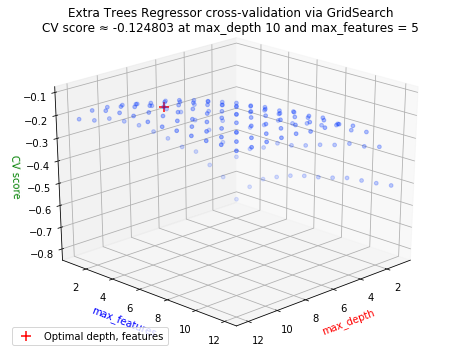

In [37]:
# Plot the optimization of the Extra Trees Regressor in 3D

fig = plt.figure(figsize = (8, 6.25))
ax = fig.gca(projection='3d')

plot3d_title = "Extra Trees Regressor cross-validation via GridSearch\n"
plot3d_title += "CV score ≈ " + str(round(grid_search_extra_trees.best_score_, 6))
plot3d_title += " at max_depth " + str(extra_trees_depth) + " and max_features = " + str(extra_trees_features)

ax.set_title(plot3d_title)
ax.set_xlabel("max_depth", color = "r")
ax.set_ylabel("max_features", color = "b")
ax.set_zlabel("CV score", color = "g")
ax.scatter(extra_trees_grid_search_results["param_max_depth"], extra_trees_grid_search_results["param_max_features"],
           extra_trees_grid_search_results["mean_test_score"], s = 14, color = "#0033ff66")
ax.scatter(extra_trees_depth, extra_trees_features, grid_search_extra_trees.best_score_, s = 84, marker = "+",
           color = "#ff0000ff", label = "Optimal depth, features")
ax.legend(loc = "lower left")
ax.view_init(25, 45)
plt.savefig("extra_trees_hyperparameters.png")
plt.savefig("extra_trees_hyperparameters.pdf")

In [38]:
# Let's implement the Extra Trees Regressor model chosen by GridSearchCV()

extra_trees = ExtraTreesRegressor(max_depth = extra_trees_depth, max_features = extra_trees_features,
                                  n_estimators = 1000, random_state = RANDOM_SEED)
extra_trees.fit(features_train, target_train)
print("Training set score:\t{:.6f}".format(extra_trees.score(features_train, target_train)))
print("Test set score:\t\t{:6f}".format(extra_trees.score(features_test, target_test)))

Training set score:	0.987140
Test set score:		0.906656


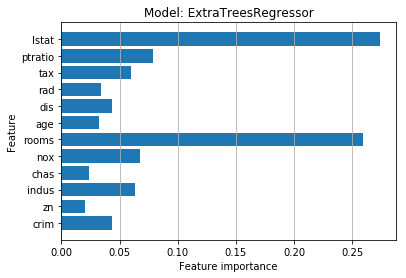

In [39]:
plot_feature_importances(extra_trees, tree_features, "extra_trees")

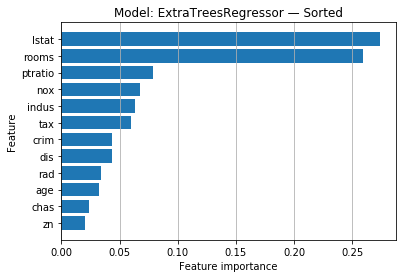

In [40]:
plot_sorted_feature_importances(extra_trees, tree_features, "extra_trees")

In [41]:
# AdaBoost! The effectiveness of an AdaBoost regressor may depend on the depth of its constituent trees
# So use Pipeline() to handle this problem

Ada_pipe = Pipeline([("preprocessing", StandardScaler()), ("model", AdaBoostRegressor(DecisionTreeRegressor()))])

rate_array = np.union1d(np.arange(0.002, 0.012, 0.002), np.arange(0.02, 0.26, 0.01))

param_grid = [{"model": [AdaBoostRegressor(DecisionTreeRegressor(max_depth = 1), random_state = RANDOM_SEED)], "preprocessing": [None],
               "model__n_estimators": [100, 200], "model__learning_rate": rate_array},
              {"model": [AdaBoostRegressor(DecisionTreeRegressor(max_depth = 2), random_state = RANDOM_SEED)], "preprocessing": [None],
               "model__n_estimators": [100, 200], "model__learning_rate": rate_array},
              {"model": [AdaBoostRegressor(DecisionTreeRegressor(max_depth = 3), random_state = RANDOM_SEED)], "preprocessing": [None],
               "model__n_estimators": [100, 200], "model__learning_rate": rate_array},
              {"model": [AdaBoostRegressor(DecisionTreeRegressor(max_depth = 4), random_state = RANDOM_SEED)], "preprocessing": [None],
               "model__n_estimators": [100, 200], "model__learning_rate": rate_array},
              {"model": [AdaBoostRegressor(DecisionTreeRegressor(max_depth = 5), random_state = RANDOM_SEED)], "preprocessing": [None],
               "model__n_estimators": [100, 200], "model__learning_rate": rate_array}]

grid_search_Ada_pipe = GridSearchCV(Ada_pipe, param_grid, cv = 5, iid = False, return_train_score = True,
                                    scoring = negative_mse_scorer)

grid_search_Ada_pipe.fit(features_train, target_train)
print("GridSearchCV() analysis of AdaBoost regression:")
print("Best parameter:\t{}".format(grid_search_Ada_pipe.best_params_))
print("Best cv score:\t{:.6f}".format(grid_search_Ada_pipe.best_score_))
print("Test set score:\t{:6f}".format(grid_search_Ada_pipe.score(features_test, target_test)))

GridSearchCV() analysis of AdaBoost regression:
Best parameter:	{'model': AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse',
                                                       max_depth=5,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort=False,
                                                       random_state=None,
                                                       splitter='best'),
                  lea

In [42]:
# Transfer GridSearchCV() results for the competition Pipeline() to a pandas DataFrame

grid_search_Ada_pipe_results = pd.DataFrame(grid_search_Ada_pipe.cv_results_)
# print(grid_search_Ada_pipe_results.info())
# print(grid_search_Ada_pipe_results["param_model"][0])


Ada_pipe_frame = grid_search_Ada_pipe_results.loc[:, ["rank_test_score", "param_model", "param_model__learning_rate",
                                              "param_model__n_estimators", "mean_train_score",
                                              "mean_test_score"]].sort_values(by = "rank_test_score")
Ada_pipe_frame.head(12)

,rank_test_score,param_model,param_model__learning_rate,param_model__n_estimators,mean_train_score,mean_test_score
270,1,"(DecisionTreeRegressor(criterion='mse', max_de...",0.16,100,-0.028959,-0.107992
258,2,"(DecisionTreeRegressor(criterion='mse', max_de...",0.1,100,-0.030190,-0.108115
260,3,"(DecisionTreeRegressor(criterion='mse', max_de...",0.11,100,-0.029450,-0.108544
272,4,"(DecisionTreeRegressor(criterion='mse', max_de...",0.17,100,-0.029216,-0.109153
247,5,"(DecisionTreeRegressor(criterion='mse', max_de...",0.04,200,-0.030723,-0.109326
254,6,"(DecisionTreeRegressor(criterion='mse', max_de...",0.08,100,-0.030955,-0.109600
250,7,"(DecisionTreeRegressor(criterion='mse', max_de...",0.06,100,-0.031742,-0.110134
264,8,"(DecisionTreeRegressor(criterion='mse', max_de...",0.13,100,-0.029405,-0.110649
248,9,"(DecisionTreeRegressor(criterion='mse', max_de...",0.05,100,-0.032391,-0.110779
276,10,"(DecisionTreeRegressor(criterion='mse', max_de...",0.19,100,-0.028881,-0.110913


In [43]:
Ada_overfit_frame = Ada_pipe_frame.copy()
Ada_overfit_frame.rename(columns = {"param_model": "tree_depth", "param_model__learning_rate": "learning_rate",
                         "param_model__n_estimators": "n_estimators"}, inplace = True)
Ada_overfit_frame["tree_depth"] = Ada_overfit_frame["tree_depth"].map(lambda x: int(str(x).partition("max_depth=")[2][0]))
Ada_overfit_frame["train_minus_test"] = Ada_overfit_frame["mean_train_score"] - Ada_overfit_frame["mean_test_score"]

Ada_overfit_frame.head(12)

,rank_test_score,tree_depth,learning_rate,n_estimators,mean_train_score,mean_test_score,train_minus_test
270,1,5,0.16,100,-0.028959,-0.107992,0.079034
258,2,5,0.1,100,-0.030190,-0.108115,0.077925
260,3,5,0.11,100,-0.029450,-0.108544,0.079095
272,4,5,0.17,100,-0.029216,-0.109153,0.079938
247,5,5,0.04,200,-0.030723,-0.109326,0.078603
254,6,5,0.08,100,-0.030955,-0.109600,0.078645
250,7,5,0.06,100,-0.031742,-0.110134,0.078392
264,8,5,0.13,100,-0.029405,-0.110649,0.081244
248,9,5,0.05,100,-0.032391,-0.110779,0.078388
276,10,5,0.19,100,-0.028881,-0.110913,0.082033


In [44]:
# The top entry contains the optimized hyperparameters. Harvest the appropriate values:

AdaBoost_depth = Ada_overfit_frame.iloc[0]["tree_depth"]
AdaBoost_learning_rate = Ada_overfit_frame.iloc[0]["learning_rate"]
AdaBoost_estimators = Ada_overfit_frame.iloc[0]["n_estimators"]
AdaBoost_best_score = Ada_overfit_frame.iloc[0]["mean_test_score"]

print("Pipeline() has determined these optimal AdaBoost hyperparameters:\n")
print("{:>14}\t{:d}".format("Tree depth:", AdaBoost_depth))
print("{:>14}\t{:.2f}".format("Learning rate:", AdaBoost_learning_rate))
print("{:>14}\t{:d}".format("Estimators:", AdaBoost_estimators))
print("{:>14}\t{:6f}".format("Best CV score:", AdaBoost_best_score))

Pipeline() has determined these optimal AdaBoost hyperparameters:

   Tree depth:	5
Learning rate:	0.16
   Estimators:	100
Best CV score:	-0.107992


In [45]:
# Sorting this dataframe by train_minus_test ranks AdaBoost models by ascending vulnerability to overfitting

Ada_overfit_frame.sort_values(by = "train_minus_test").head(12)

,rank_test_score,tree_depth,learning_rate,n_estimators,mean_train_score,mean_test_score,train_minus_test
52,237,1,0.23,100,-0.413800,-0.445435,0.031635
53,237,1,0.23,200,-0.413800,-0.445435,0.031635
44,233,1,0.19,100,-0.403192,-0.437304,0.034113
45,233,1,0.19,200,-0.403192,-0.437304,0.034113
57,235,1,0.25,200,-0.408966,-0.443358,0.034392
56,235,1,0.25,100,-0.408966,-0.443358,0.034392
35,239,1,0.14,200,-0.411972,-0.448932,0.036960
34,239,1,0.14,100,-0.411972,-0.448932,0.036960
1,286,1,0.002,200,-0.445810,-0.483924,0.038114
6,284,1,0.008,100,-0.443147,-0.481453,0.038306


In [46]:
# Sort, but only for tree_depth = AdaBoost_depth

Ada_overfit_frame[Ada_overfit_frame["tree_depth"] == AdaBoost_depth].sort_values(by = "train_minus_test").head(12)

,rank_test_score,tree_depth,learning_rate,n_estimators,mean_train_score,mean_test_score,train_minus_test
239,26,5,0.008,200,-0.036528,-0.114178,0.077649
258,2,5,0.1,100,-0.030190,-0.108115,0.077925
237,37,5,0.006,200,-0.037469,-0.115800,0.078331
248,9,5,0.05,100,-0.032391,-0.110779,0.078388
250,7,5,0.06,100,-0.031742,-0.110134,0.078392
238,42,5,0.008,100,-0.038387,-0.116952,0.078564
246,16,5,0.04,100,-0.033497,-0.112093,0.078596
247,5,5,0.04,200,-0.030723,-0.109326,0.078603
254,6,5,0.08,100,-0.030955,-0.109600,0.078645
235,41,5,0.004,200,-0.037824,-0.116641,0.078817


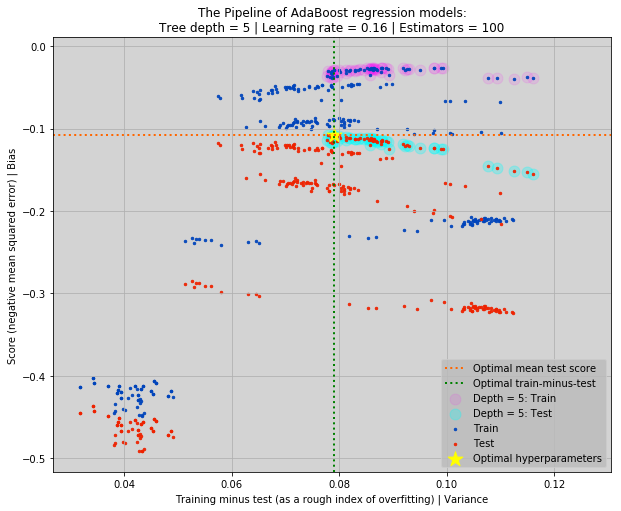

In [47]:
# We can visualize the AdaBoost Pipeline() by plotting training and test results


right_depth_series = Ada_overfit_frame[Ada_overfit_frame["tree_depth"] == AdaBoost_depth].loc[:, "rank_test_score"]
# print(depth_5_series.iloc[3])
right_depth = []
for i in range(len(right_depth_series)):
    right_depth += [right_depth_series.iloc[i] - 1]

# plt.figure(figsize = (10, 8))
fig, ax = plt.subplots(figsize = (10, 8))
fig.set_facecolor("white")
ax.set_facecolor("lightgray")

plt.scatter(Ada_overfit_frame.iloc[right_depth]["train_minus_test"],
            Ada_overfit_frame.iloc[right_depth]["mean_train_score"], color = "#ff00ff1a", s = 120,
            marker = "o", label = "Depth = " + str(AdaBoost_depth) + ": Train")
plt.scatter(Ada_overfit_frame.iloc[right_depth]["train_minus_test"],
            Ada_overfit_frame.iloc[right_depth]["mean_test_score"], color = "#00ffff44", s = 120,
            marker = "o", label = "Depth = " + str(AdaBoost_depth) + ": Test")

plt.scatter(Ada_overfit_frame["train_minus_test"], Ada_overfit_frame["mean_train_score"], color = "#0044bbee", s = 6, label = "Train")
plt.scatter(Ada_overfit_frame["train_minus_test"], Ada_overfit_frame["mean_test_score"], color = "#ee2200ee", s = 6, label = "Test")

plt.scatter(Ada_overfit_frame.iloc[0]["train_minus_test"], Ada_overfit_frame.iloc[0]["mean_test_score"],
            color = "#ffff00ff", marker = "*", s = 240, label = "Optimal hyperparameters")

plt.axhline(Ada_overfit_frame.iloc[0]["mean_test_score"], color = "#ff6600ff", linestyle = ":", linewidth = 2, label = "Optimal mean test score")
plt.axvline(Ada_overfit_frame.iloc[0]["train_minus_test"], color = "green", linestyle = ":", linewidth = 2, label = "Optimal train-minus-test")


plt.grid()
graph_title = "The Pipeline of AdaBoost regression models:\n"
graph_title += "Tree depth = " + str(AdaBoost_depth)
graph_title += " | Learning rate = " + str(round(AdaBoost_learning_rate, 2))
graph_title += " | Estimators = " + str(AdaBoost_estimators)

plt.title(graph_title)
plt.xlabel("Training minus test (as a rough index of overfitting) | Variance")
plt.ylabel("Score (negative mean squared error) | Bias")
plt.legend(loc = "lower right", facecolor = "#bbbbbbbb")
plt.savefig("Ada_pipe_train_minus_test.png")
plt.savefig("Ada_pipe_train_minus_test.pdf")

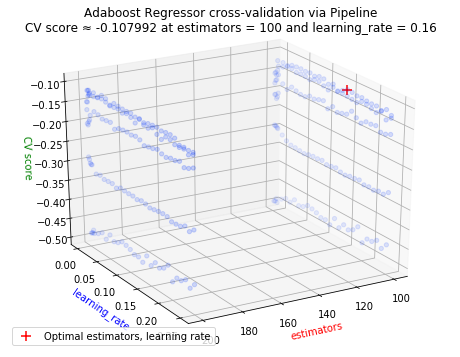

In [48]:
# Plot the optimization of the AdaBoost Regressor in 3D

fig = plt.figure(figsize = (8, 6.25))
ax = fig.gca(projection='3d')

plot3d_title = "Adaboost Regressor cross-validation via Pipeline\n"
plot3d_title += "CV score ≈ " + str(round(AdaBoost_best_score, 6))
plot3d_title += " at estimators = " + str(AdaBoost_estimators) + " and learning_rate = " + str(round(AdaBoost_learning_rate, 2))

ax.set_title(plot3d_title)
ax.set_xlabel("estimators", color = "r")
ax.set_ylabel("learning_rate", color = "b")
ax.set_zlabel("CV score", color = "g")
ax.scatter(Ada_overfit_frame["n_estimators"], Ada_overfit_frame["learning_rate"],
           Ada_overfit_frame["mean_test_score"], s = 18, color = "#0033ff33")
ax.scatter(AdaBoost_estimators, AdaBoost_learning_rate, AdaBoost_best_score, s = 84, marker = "+",
           color = "#ff0000ff", label = "Optimal estimators, learning rate")
ax.legend(loc = "lower left")
ax.view_init(25, 60)
plt.savefig("AdaBoost_hyperparameters.png")
plt.savefig("AdaBoost_hyperparameters.pdf")

In [49]:
# Use .staged_predict to fine-tune the number of AdaBoost's estimators
# Code adapted from Géron, p. 200

AdaBoostTrials = AdaBoostRegressor(DecisionTreeRegressor(max_depth = AdaBoost_depth),
                                   n_estimators = AdaBoost_estimators, learning_rate = AdaBoost_learning_rate,
                                   random_state = RANDOM_SEED)
AdaBoostTrials.fit(features_train, target_train)

errors = [mean_squared_error(target_test, predictions)
          for predictions in AdaBoostTrials.staged_predict(features_test)]
best_estimators = np.argmin(errors)
AdaBoost_estimators = best_estimators

print("Optimal estimators for AdaBoost =", AdaBoost_estimators)

Optimal estimators for AdaBoost = 20


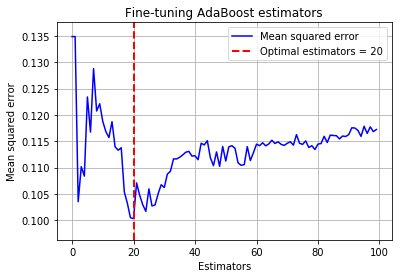

In [50]:
# Plot the error path for fine-tuning AdaBoost estimators

plt.grid()
plt.plot(errors, color = "blue", label = "Mean squared error")
plt.axvline(best_estimators, color = "red", linewidth = 2, linestyle = "--",
            label = "Optimal estimators = " + str(best_estimators))
plt.ylim(min(errors) * 0.96, max(errors) * 1.02)
plt.title("Fine-tuning AdaBoost estimators")
plt.xlabel("Estimators")
plt.ylabel("Mean squared error")
plt.legend(loc = "best")
plt.savefig("AdaBoost_estimators.png")
plt.savefig("AdaBoost_estimators.pdf")

In [51]:
# Let's implement the AdaBoost Regressor model chosen by Pipeline(), with our newly determined estimator value

AdaBoost = AdaBoostRegressor(DecisionTreeRegressor(max_depth = AdaBoost_depth),
                             n_estimators = AdaBoost_estimators, learning_rate = AdaBoost_learning_rate,
                             random_state = RANDOM_SEED)
AdaBoost.fit(features_train, target_train)
print("Training set score:\t{:.6f}".format(AdaBoost.score(features_train, target_train)))
print("Test set score:\t\t{:6f}".format(AdaBoost.score(features_test, target_test)))

Training set score:	0.956631
Test set score:		0.914430


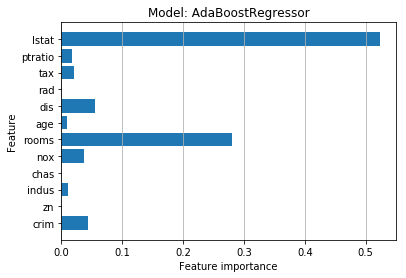

In [52]:
plot_feature_importances(AdaBoost, tree_features, "AdaBoost")

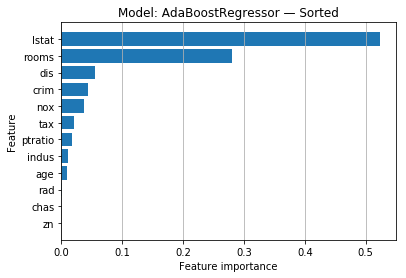

In [53]:
plot_sorted_feature_importances(AdaBoost, tree_features, "AdaBoost")

In [54]:
# Gradient Boosting Regressor = gbr

# Use GridSearchCV() to evaluate gbr

# Old search parameters. These took an egregious amount of time.

# rate_array = np.union1d(np.arange(0.001, 0.010, 0.001), np.arange(0.01, 0.31, 0.01))
# param_grid = {"n_estimators": [50, 100, 200], "learning_rate": rate_array,
#               "max_depth": range(1, model_data.shape[1])}

# See whether we can speed this up by shortening the depth of the parameter grid — Yes!

rate_array = np.union1d(np.arange(0.002, 0.012, 0.002), np.arange(0.02, 0.26, 0.01))
param_grid = {"learning_rate": rate_array, "max_depth": range(1, model_data.shape[1] // 2 + 1),
              "n_estimators": [100]}

grid_search_gbr = GridSearchCV(GradientBoostingRegressor(random_state = RANDOM_SEED), param_grid,
                               cv = 5, return_train_score = True, scoring = negative_mse_scorer, iid = False)

grid_search_gbr.fit(features_train, target_train)
print("Best parameter:\t{}".format(grid_search_gbr.best_params_))
print("Best cv score:\t{:.6f}".format(grid_search_gbr.best_score_))
print("Test set score:\t{:6f}".format(grid_search_gbr.score(features_test, target_test)))

# Save the optimal value of the parameters for the gradient boosting regressor

gbr_depth = grid_search_gbr.best_params_["max_depth"]
gbr_estimators = grid_search_gbr.best_params_["n_estimators"]
gbr_learning_rate = grid_search_gbr.best_params_["learning_rate"]

Best parameter:	{'learning_rate': 0.09, 'max_depth': 4, 'n_estimators': 100}
Best cv score:	-0.105342
Test set score:	-0.095870


In [55]:
# Transfer GridSearchCV() results for Gradient Boosting Regressor to a pandas DataFrame

gbr_grid_search_results = pd.DataFrame(grid_search_gbr.cv_results_)
gbr_grid_search_results.loc[:, ["rank_test_score", "param_max_depth", "param_n_estimators", "param_learning_rate", "mean_test_score", "std_test_score"]].sort_values(by = "rank_test_score").head(12)

,rank_test_score,param_max_depth,param_n_estimators,param_learning_rate,mean_test_score,std_test_score
75,1,4,100,0.09,-0.105342,0.011136
170,2,3,100,0.25,-0.106781,0.015741
134,3,3,100,0.19,-0.107134,0.010061
117,4,4,100,0.16,-0.107700,0.021827
140,5,3,100,0.2,-0.108419,0.013291
81,6,4,100,0.1,-0.109549,0.018891
164,7,3,100,0.24,-0.110206,0.015612
122,8,3,100,0.17,-0.110375,0.009718
123,9,4,100,0.17,-0.110476,0.022627
158,10,3,100,0.23,-0.111174,0.021572


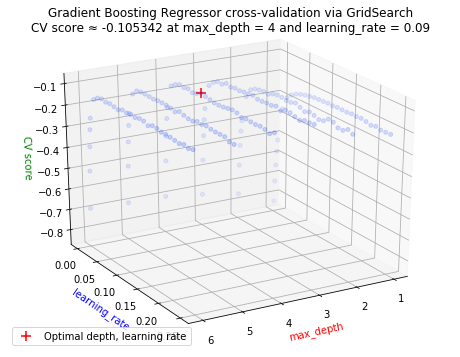

In [56]:
# Plot the optimization of the Gradient Boosting Regressor in 3D

fig = plt.figure(figsize = (8, 6.25))
ax = fig.gca(projection='3d')

plot3d_title = "Gradient Boosting Regressor cross-validation via GridSearch\n"
plot3d_title += "CV score ≈ " + str(round(grid_search_gbr.best_score_, 6))
plot3d_title += " at max_depth = " + str(gbr_depth) + " and learning_rate = " + str(gbr_learning_rate)

ax.set_title(plot3d_title)
ax.set_xlabel("max_depth", color = "r")
ax.set_ylabel("learning_rate", color = "b")
ax.set_zlabel("CV score", color = "g")
ax.scatter(gbr_grid_search_results["param_max_depth"], gbr_grid_search_results["param_learning_rate"],
           gbr_grid_search_results["mean_test_score"], s = 16, color = "#0033ff33")
ax.scatter(gbr_depth, gbr_learning_rate, grid_search_gbr.best_score_, s = 84, marker = "+",
           color = "#ff0000ff", label = "Optimal depth, learning rate")
ax.legend(loc = "lower left")
ax.view_init(25, 60)
plt.savefig("gbr_hyperparameters.png")
plt.savefig("gbr_hyperparameters.pdf")

In [57]:
# Use early stopping to fine-tune the number of Gradient Boosting Regression's estimators
# This is a good alternative to .staged_predict, which does almost nothing for Gradient Boosting
# N.b.: Can't do this for AdaBoost, because that model lacks a warm_start parameter
# Code adapted from Géron, p. 201

gbrWarmStart = GradientBoostingRegressor(max_depth = gbr_depth, learning_rate = gbr_learning_rate,
                                         n_estimators = gbr_estimators * 2.5, random_state = RANDOM_SEED,
                                         warm_start = True)

minimum_validation_error = float("inf")
error_going_up = 0
errors = []

for estimators in range(1, int(gbr_estimators * 2.5) + 1):
    gbrWarmStart.n_estimators = estimators
    gbrWarmStart.fit(features_train, target_train)
    predictions = gbrWarmStart.predict(features_test)
    validation_error = mean_squared_error(target_test, predictions)
    errors += [validation_error]
    if validation_error < minimum_validation_error:
        minimum_validation_error = validation_error
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up == 5:
            print("Stopping early at", estimators, "estimators! Searching for the lowest MSE in this range …\n")
            break  # Early stopping

best_estimators = np.argsort(errors)[0]
gbr_estimators = best_estimators
print("Optimal estimators for Gradient Boosting Regressor =", best_estimators)

Stopping early at 119 estimators! Searching for the lowest MSE in this range …

Optimal estimators for Gradient Boosting Regressor = 113


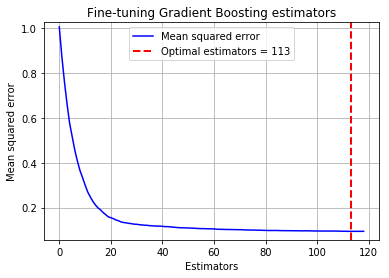

In [58]:
# Plot the error path for fine-tuning gbr estimators

plt.grid()
plt.plot(errors, color = "blue", label = "Mean squared error")
plt.axvline(best_estimators, color = "red", linewidth = 2, linestyle = "--",
            label = "Optimal estimators = " + str(best_estimators))
plt.ylim(min(errors) * 0.6, max(errors) * 1.02)
plt.title("Fine-tuning Gradient Boosting estimators")
plt.xlabel("Estimators")
plt.ylabel("Mean squared error")
plt.legend(loc = "upper center")
plt.savefig("gbr_estimators.png")
plt.savefig("gbr_estimators.pdf")

In [59]:
# Let's implement the Gradient Boosting Regressor model chosen by GridSearchCV()

gbr = GradientBoostingRegressor(max_depth = gbr_depth, learning_rate = gbr_learning_rate,
                                n_estimators = gbr_estimators, random_state = RANDOM_SEED)
gbr.fit(features_train, target_train)
print("Training set score:\t{:.6f}".format(gbr.score(features_train, target_train)))
print("Test set score:\t\t{:6f}".format(gbr.score(features_test, target_test)))

Training set score:	0.992716
Test set score:		0.919648


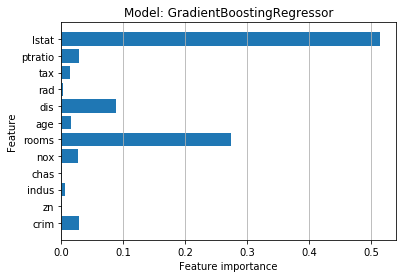

In [60]:
plot_feature_importances(gbr, tree_features, "gbr")

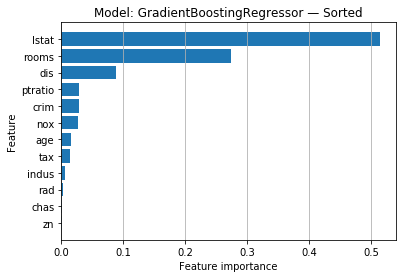

In [61]:
plot_sorted_feature_importances(gbr, tree_features, "gbr")

In [62]:
# Use GridSearchCV() to evaluate gbr, round 2
# The use of the subsample parameter converts this model into * Stochastic Gradient Boosting *

rate_array = np.union1d(np.arange(0.002, 0.012, 0.002), np.arange(0.02, 0.26, 0.01))
param_grid = {"learning_rate": rate_array, "max_depth": range(1, model_data.shape[1] // 2 + 1),
              "subsample": np.arange(0.25, 0.80, 0.05)}

grid_search_sgbr = GridSearchCV(GradientBoostingRegressor(random_state = RANDOM_SEED, n_estimators = 100),
                                param_grid, cv = 5, return_train_score = True, scoring = negative_mse_scorer,
                                iid = False)
grid_search_sgbr.fit(features_train, target_train)
print("Best parameter:\t{}".format(grid_search_sgbr.best_params_))
print("Best cv score:\t{:.6f}".format(grid_search_sgbr.best_score_))
print("Test set score:\t{:6f}".format(grid_search_sgbr.score(features_test, target_test)))

# Save the optimal value of the parameters for the stochastic gradient boosting regressor
sgbr_depth = grid_search_sgbr.best_params_["max_depth"]
# sgbr_estimators = grid_search_gbr.best_params_["n_estimators"]  # Defer this step for the stochastic variant
sgbr_learning_rate = grid_search_sgbr.best_params_["learning_rate"]
sgbr_subsample = grid_search_sgbr.best_params_["subsample"]

Best parameter:	{'learning_rate': 0.07999999999999999, 'max_depth': 5, 'subsample': 0.6499999999999999}
Best cv score:	-0.100391
Test set score:	-0.089932


In [63]:
# Transfer GridSearchCV() results for the Stochastic Gradient Boosting Regressor to a pandas DataFrame

sgbr_grid_search_results = pd.DataFrame(grid_search_sgbr.cv_results_)
sgbr_grid_search_results.loc[:, ["rank_test_score", "param_max_depth", "param_learning_rate", "param_subsample", "mean_test_score", "std_test_score"]].sort_values(by = "rank_test_score").head(12)

,rank_test_score,param_max_depth,param_learning_rate,param_subsample,mean_test_score,std_test_score
778,1,5,0.08,0.65,-0.100391,0.010663
1295,2,4,0.16,0.65,-0.101294,0.007812
1229,3,4,0.15,0.65,-0.101565,0.013071
1319,4,6,0.16,0.75,-0.101988,0.017840
1625,5,4,0.21,0.65,-0.102290,0.008038
1440,6,5,0.18,0.75,-0.102456,0.014728
1031,7,4,0.12,0.65,-0.103061,0.007384
646,8,5,0.06,0.65,-0.103487,0.008241
1350,9,3,0.17,0.65,-0.104757,0.014365
910,10,5,0.1,0.65,-0.104977,0.014489


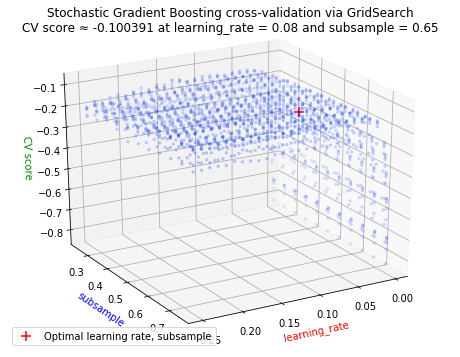

In [64]:
# Plot the optimization of the Gradient Boosting Regressor in 3D

fig = plt.figure(figsize = (8, 6.25))
ax = fig.gca(projection='3d')

plot3d_title = "Stochastic Gradient Boosting cross-validation via GridSearch\n"
plot3d_title += "CV score ≈ " + str(round(grid_search_sgbr.best_score_, 6))
plot3d_title += " at learning_rate = " + str(round(sgbr_learning_rate, 2)) + " and subsample = " + str(round(sgbr_subsample, 2))

ax.set_title(plot3d_title)
ax.set_xlabel("learning_rate", color = "r")
ax.set_ylabel("subsample", color = "b")
ax.set_zlabel("CV score", color = "g")
ax.scatter(sgbr_grid_search_results["param_learning_rate"], sgbr_grid_search_results["param_subsample"],
           sgbr_grid_search_results["mean_test_score"], s = 6, color = "#0033ff33")
ax.scatter(gbr_learning_rate, sgbr_subsample, grid_search_gbr.best_score_, s = 84, marker = "+",
           color = "#ff0000ff", label = "Optimal learning rate, subsample")
ax.legend(loc = "lower left")
ax.view_init(25, 60)
plt.savefig("sgbr_hyperparameters.png")
plt.savefig("sgbr_hyperparameters.pdf")

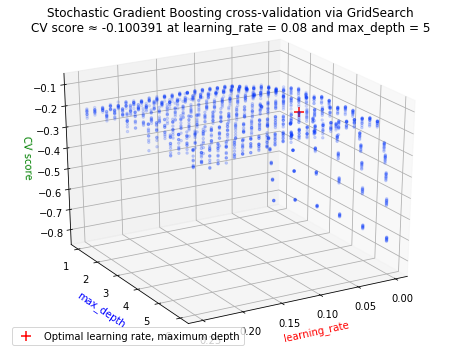

In [65]:
# Plot the optimization of the Gradient Boosting Regressor in 3D

fig = plt.figure(figsize = (8, 6.25))
ax = fig.gca(projection='3d')

plot3d_title = "Stochastic Gradient Boosting cross-validation via GridSearch\n"
plot3d_title += "CV score ≈ " + str(round(grid_search_sgbr.best_score_, 6))
plot3d_title += " at learning_rate = " + str(round(sgbr_learning_rate, 2)) + " and max_depth = " + str(round(sgbr_depth))

ax.set_title(plot3d_title)
ax.set_xlabel("learning_rate", color = "r")
ax.set_ylabel("max_depth", color = "b")
ax.set_zlabel("CV score", color = "g")
ax.scatter(sgbr_grid_search_results["param_learning_rate"], sgbr_grid_search_results["param_max_depth"],
           sgbr_grid_search_results["mean_test_score"], s = 6, color = "#0033ff33")
ax.scatter(gbr_learning_rate, sgbr_depth, grid_search_gbr.best_score_, s = 84, marker = "+",
           color = "#ff0000ff", label = "Optimal learning rate, maximum depth")
ax.legend(loc = "lower left")
ax.view_init(25, 60)
plt.savefig("sgbr_hyperparameters2.png")
plt.savefig("sgbr_hyperparameters2.pdf")

In [66]:
# Use .staged_predict to fine-tune the number of sgbr's estimators
# Code adapted from Géron, p. 200

sgbrTrials = GradientBoostingRegressor(max_depth = sgbr_depth, learning_rate = sgbr_learning_rate,
                                      subsample = sgbr_subsample, n_estimators = 200, random_state = RANDOM_SEED)
sgbrTrials.fit(features_train, target_train)

errors = [mean_squared_error(target_test, predictions)
          for predictions in sgbrTrials.staged_predict(features_test)]
best_estimators = np.argmin(errors)
sgbr_estimators = best_estimators

print("Optimal estimators for stochastic GBR =", sgbr_estimators)

Optimal estimators for stochastic GBR = 84


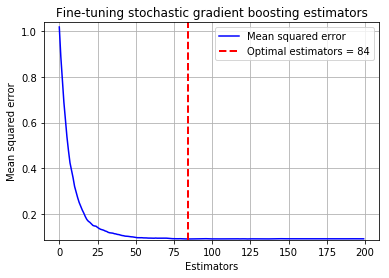

In [67]:
# Plot the error path for fine-tuning stochastic GBR estimators

plt.grid()
plt.plot(errors, color = "blue", label = "Mean squared error")
plt.axvline(best_estimators, color = "red", linewidth = 2, linestyle = "--",
            label = "Optimal estimators = " + str(sgbr_estimators))
plt.ylim(min(errors) * 0.96, max(errors) * 1.02)
plt.title("Fine-tuning stochastic gradient boosting estimators")
plt.xlabel("Estimators")
plt.ylabel("Mean squared error")
plt.legend(loc = "best")
plt.savefig("sgbr_estimators.png")
plt.savefig("sgbr_estimators.pdf")

In [68]:

sgbrWarmStart = GradientBoostingRegressor(max_depth = sgbr_depth, learning_rate = sgbr_learning_rate,
                                         n_estimators = 200, random_state = RANDOM_SEED, warm_start = True)

minimum_validation_error = float("inf")
error_going_up = 0
errors = []

for estimators in range(1, 201):
    sgbrWarmStart.n_estimators = estimators
    sgbrWarmStart.fit(features_train, target_train)
    predictions = sgbrWarmStart.predict(features_test)
    validation_error = mean_squared_error(target_test, predictions)
    errors += [validation_error]
    if validation_error < minimum_validation_error:
        minimum_validation_error = validation_error
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up == 5:
            print("Stopping early at", estimators, "estimators! Searching for the lowest MSE in this range …\n")
            break  # Early stopping

best_estimators = np.argsort(errors)[0]
# gbr_estimators = best_estimators
print("Optimal estimators for stochastic gradient boosting =", best_estimators)

Stopping early at 78 estimators! Searching for the lowest MSE in this range …

Optimal estimators for stochastic gradient boosting = 72


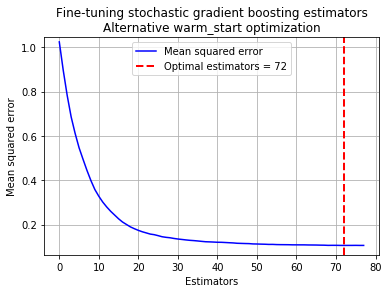

In [69]:
# Plot the error path for fine-tuning gbr estimators

plt.grid()
plt.plot(errors, color = "blue", label = "Mean squared error")
plt.axvline(best_estimators, color = "red", linewidth = 2, linestyle = "--",
            label = "Optimal estimators = " + str(best_estimators))
plt.ylim(min(errors) * 0.6, max(errors) * 1.02)
plt.title("Fine-tuning stochastic gradient boosting estimators\nAlternative warm_start optimization")
plt.xlabel("Estimators")
plt.ylabel("Mean squared error")
plt.legend(loc = "upper center")
plt.savefig("sgbr_warm_start_estimators.png")
plt.savefig("sgbr_warm_start_estimators.pdf")

In [70]:
# Let's implement the Stochastic Gradient Boosting Regressor model chosen by GridSearchCV() …
#   … and fine-tuned by staged_predict (optimal number of estimators)
# There's no reason to discard the staged_predict recommendation in favor of the warm_start alternative
# The two values are very close, and staged_predict purports to report a global rather than local minimum

sgbr = GradientBoostingRegressor(max_depth = sgbr_depth, learning_rate = sgbr_learning_rate,
                                 subsample = sgbr_subsample, n_estimators = sgbr_estimators,
                                 random_state = RANDOM_SEED)
sgbr.fit(features_train, target_train)
print("Training set score:\t{:.6f}".format(sgbr.score(features_train, target_train)))
print("Test set score:\t\t{:6f}".format(sgbr.score(features_test, target_test)))

Training set score:	0.993116
Test set score:		0.923835


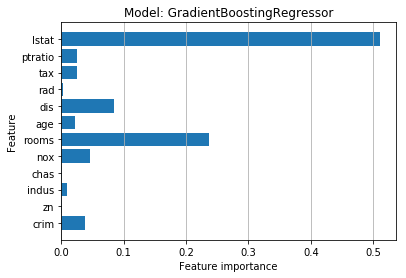

In [71]:
plot_feature_importances(sgbr, tree_features, "sgbr")

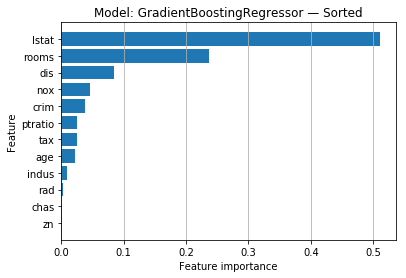

In [72]:
plot_sorted_feature_importances(sgbr, tree_features, "sgbr")

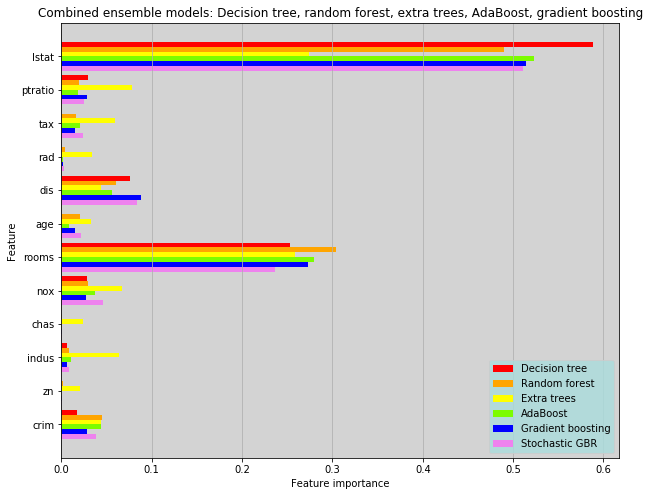

In [73]:
# Let's visualize all of the feature importance weights together in a consolidated horizontal bar chart

def all_plot_feature_importances(model_1, model_2, model_3, model_4, model_5, model_6, feature_names, file_name):
    n_features = len(model_1.feature_importances_)
    # plt.barh(np.arange(n_features), model.feature_importances_, align = "center")
    width = 0.144
    fig, ax = plt.subplots(figsize = (10, 8))
    fig.set_facecolor("white")
    ax.set_facecolor("lightgray")
    ax.xaxis.grid(True)
    ax.barh(np.arange(n_features) + 5/2 * width, model_1.feature_importances_, width, color = "red", align = "center", label = "Decision tree")
    ax.barh(np.arange(n_features) + 3/2 * width, model_2.feature_importances_, width, color = "orange", align = "center", label = "Random forest")
    ax.barh(np.arange(n_features) + 1/2 * width, model_3.feature_importances_, width, color = "yellow", align = "center", label = "Extra trees")
    ax.barh(np.arange(n_features) - 1/2 * width, model_4.feature_importances_, width, color = "lawngreen", align = "center", label = "AdaBoost")
    ax.barh(np.arange(n_features) - 3/2 * width, model_5.feature_importances_, width, color = "blue", align = "center", label = "Gradient boosting")
    ax.barh(np.arange(n_features) - 5/2 * width, model_6.feature_importances_, width, color = "violet", align = "center", label = "Stochastic GBR")
    ax.legend()
    plt.title("Combined ensemble models: Decision tree, random forest, extra trees, AdaBoost, gradient boosting")
    plt.yticks(np.arange(n_features), feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    ax.legend(loc ="lower right", facecolor = "#aadddd22")
    plt.savefig(file_name + "_feature_importances.png")
    plt.savefig(file_name + "_feature_importances.pdf")

all_plot_feature_importances(tree, forest, extra_trees, AdaBoost, gbr, sgbr, tree_features, "all_models")

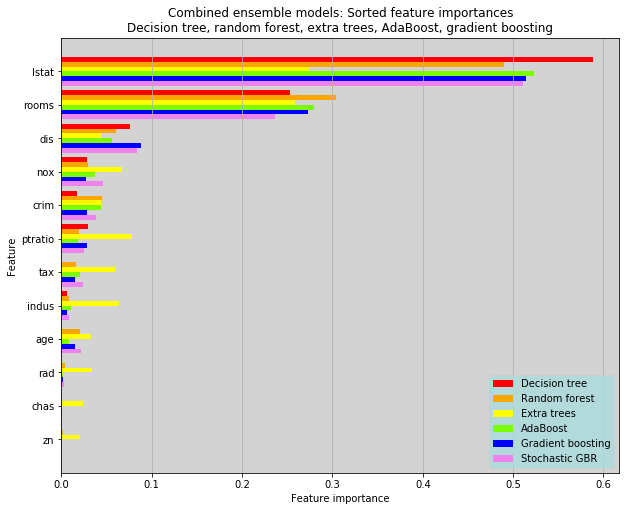

In [74]:
# Same plot, but sorted in descending order of importances

def all_plot_sorted_feature_importances(model_1, model_2, model_3, model_4, model_5, model_6, feature_names, file_name):
    n_features = len(model_1.feature_importances_)
    all_importances = model_1.feature_importances_ + model_2.feature_importances_ + model_3.feature_importances_ + model_4.feature_importances_ + model_5.feature_importances_ + model_6.feature_importances_
    sorted_index = np.argsort(all_importances)
    position = np.arange(sorted_index.shape[0])
    width = 0.144
    fig, ax = plt.subplots(figsize = (10, 8))
    fig.set_facecolor("white")
    ax.set_facecolor("lightgray")
    ax.xaxis.grid(True)
    ax.barh(position + 5/2 * width, model_1.feature_importances_[sorted_index], width, color = "red", align = "center", label = "Decision tree")
    ax.barh(position + 3/2 * width, model_2.feature_importances_[sorted_index], width, color = "orange", align = "center", label = "Random forest")
    ax.barh(position + 1/2 * width, model_3.feature_importances_[sorted_index], width, color = "yellow", align = "center", label = "Extra trees")
    ax.barh(position - 1/2 * width, model_4.feature_importances_[sorted_index], width, color = "lawngreen", align = "center", label = "AdaBoost")
    ax.barh(position - 3/2 * width, model_5.feature_importances_[sorted_index], width, color = "blue", align = "center", label = "Gradient boosting")
    ax.barh(position - 5/2 * width, model_6.feature_importances_[sorted_index], width, color = "violet", align = "center", label = "Stochastic GBR")
    plt.title("Combined ensemble models: Sorted feature importances\nDecision tree, random forest, extra trees, AdaBoost, gradient boosting")
    plt.yticks(position, feature_names[sorted_index])
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    ax.legend(loc ="lower right", facecolor = "#aadddd22")
    plt.savefig(file_name + "_sorted_feature_importances.png")
    plt.savefig(file_name + "_sorted_feature_importances.pdf")

all_plot_sorted_feature_importances(tree, forest, extra_trees, AdaBoost, gbr, sgbr, tree_features, "all_models")

In [75]:
# VotingRegressor() — One machine to rule them all?

voting = VotingRegressor(estimators = [("tree", tree), ("bagging", bag_tree), ("forest", forest),
                                       ("extra trees", extra_trees), ("AdaBoost", AdaBoost),
                                       ("gradient boost", gbr), ("stochastic GBR", sgbr)])

voting.fit(features_train, target_train)
print("Training set score:\t{:.6f}".format(voting.score(features_train, target_train)))
print("Test set score:\t\t{:6f}".format(voting.score(features_test, target_test)))
# print(voting.transform(features_test))
# print(voting.estimators_)
# print(voting.named_estimators_)
# voting.transform(features_test)

Training set score:	0.975860
Test set score:		0.916712


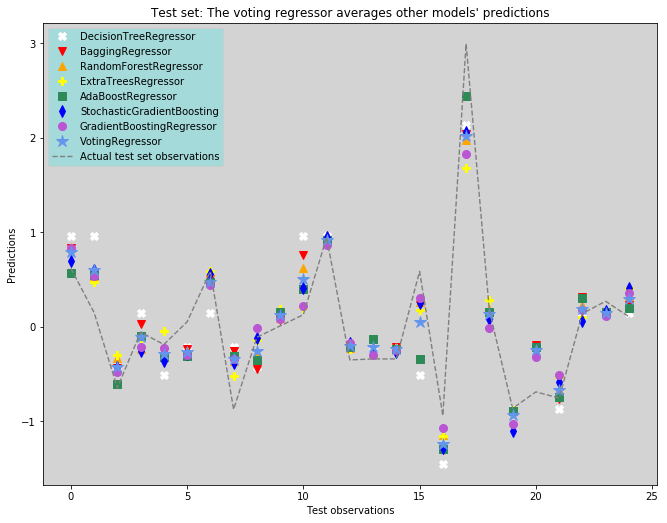

In [76]:
color_wheel = ("white", "red", "orange", "yellow", "seagreen", "blue", "mediumorchid", "cornflowerblue")
marker_wheel = ("X", "v", "^", "P", "s", "d", "o", "*")
size_wheel = (8, 8, 8, 8, 8, 8, 8, 12)

def plot_model(model, wheel_no):
    if wheel_no == 5:
        legend_label = "StochasticGradientBoosting"
    else:
        legend_label = str(model).partition("(")[0]
    plt.plot(model.predict(features_test[:25]), color = color_wheel[wheel_no], marker = marker_wheel[wheel_no],
             markersize = size_wheel[wheel_no], linestyle = "None", label = legend_label)

fig, ax = plt.subplots(figsize = (11, 8.5))
# plt.figure(figsize = (8, 6.5))
# plt.rcParams['figure.facecolor'] = "black"
fig.set_facecolor("white")
ax.set_facecolor("lightgray")
plt.title("Test set: The voting regressor averages other models' predictions")
count = 0
for model in (tree, bag_tree, forest, extra_trees, AdaBoost, gbr, sgbr, voting):
    plot_model(model, count)
    count += 1
plt.plot(target_test[:25], color = "gray", linestyle = "--", linewidth = 1.4, label = "Actual test set observations")
plt.ylabel("Predictions")
plt.xlabel("Test observations")
plt.legend(loc = "upper left", facecolor = "#99dddd")
plt.savefig("voting_plot.png")
plt.savefig("voting_plot.pdf")
plt.show()

In [77]:
# VotingRegressor() — One machine to rule them all?
# A second version, this time including the old models as well

voting2 = VotingRegressor(estimators = [("tree", tree), ("bagging", bag_tree), ("forest", forest),
                                        ("extra trees", extra_trees), ("AdaBoost", AdaBoost),
                                        ("gradient boost", gbr), ("stochastic GBR", sgbr), ("linear", lin_reg),
                                        ("ridge", ridge_reg), ("lasso", lasso_reg), ("lasso/AIC", lasso_reg_aic),
                                        ("lasso/BIC", lasso_reg_bic), ("ElasticNet", elastic_net),
                                        ("ElasticNet2", elastic_net2)])

voting2.fit(features_train, target_train)
print("Training set score:\t{:.6f}".format(voting2.score(features_train, target_train)))
print("Test set score:\t\t{:6f}".format(voting2.score(features_test, target_test)))

Training set score:	0.906924
Test set score:		0.868004


In [78]:
# VotingRegressor(), round 3. What about a VotingRegressor that polls only the four ensembles?
# forest, extra_trees, AdaBoost, and gbr
# Let's call this the Final_Five

Final_Five = VotingRegressor(estimators = [("forest", forest), ("extra trees", extra_trees),
                                           ("AdaBoost", AdaBoost), ("gradient boost", gbr),
                                           ("stochastic GBR", sgbr)])

Final_Five.fit(features_train, target_train)
print("Training set score:\t{:.6f}".format(Final_Five.score(features_train, target_train)))
print("Test set score:\t\t{:6f}".format(Final_Five.score(features_test, target_test)))

Training set score:	0.987853
Test set score:		0.924442


Time to subject ALL models, whether based on linear regression or decision trees, to the acid test of cross-validation via The Pipeline().

In [79]:
# Use Pipeline() and GridSearchCV() to evaluate competing models
# Compare code at Müller & Guido, § 6.6, pp. 325-326
# The designation of StandardScaler() as the preprocessing step is a placeholder. It is never actually used.
# All models bypass preprocessing. But Pipeline() will then pass all models with param_grid to GridSearchCV().

# The syntax of a Pipeline() requires that some model serve as the estimator: DecisionTreeRegressor()
# The real work of identifying candidates in this contest is performed by the param_grid statement.

mini_bag = BaggingRegressor(DecisionTreeRegressor(max_depth = tree_depth, random_state = RANDOM_SEED),
            n_estimators = len(target_train), max_samples = len(target_train) % 5, bootstrap = True,
            n_jobs = -1, random_state = RANDOM_SEED, oob_score = True)

# mini_bag is not used. Keep it in case we change our minds.

tree_pipe = Pipeline([("preprocessing", StandardScaler()), ("model", DecisionTreeRegressor())])

param_grid = [{"model": [Lasso()], "preprocessing": [None], "model__alpha": [lasso_alpha, aic_alpha, bic_alpha]},
              {"model": [LinearRegression()], "preprocessing": [None]},
              {"model": [Ridge()], "preprocessing": [None], "model__alpha": [ridge_alpha]},
              {"model": [ElasticNet(l1_ratio = elastic_net_l1_ratio)], "preprocessing": [None],
               "model__alpha": [elastic_net_alpha]},
              {"model": [ElasticNet(l1_ratio = elastic_net_l1_ratio2)], "preprocessing": [None],
               "model__alpha": [elastic_net_alpha2]},
              {"model": [DecisionTreeRegressor()], "preprocessing": [None],
               "model__max_depth": range(tree_depth - 2, tree_depth + 3)},
              # {"model": [mini_bag], "preprocessing": [None]},
              {"model": [RandomForestRegressor(n_estimators = 1000)], "preprocessing": [None],
               "model__max_depth": range(model_data.shape[1] - 3, model_data.shape[1]),
               "model__max_features": range(model_data.shape[1] - 4, model_data.shape[1])},
              {"model": [ExtraTreesRegressor(n_estimators = 1000)], "preprocessing": [None],
               "model__max_depth": range(model_data.shape[1] - 5, model_data.shape[1]),
               "model__max_features": range(extra_trees_features - 2, extra_trees_features + 3)},
              {"model": [AdaBoostRegressor()], "preprocessing": [None],
               "model__n_estimators": range(AdaBoost_estimators - 10, AdaBoost_estimators + 11, 5),
               "model__learning_rate": np.arange(AdaBoost_learning_rate - 0.08, AdaBoost_learning_rate + 0.09, 0.02)},
              {"model": [GradientBoostingRegressor()], "preprocessing": [None],
               "model__n_estimators": range(min(gbr_estimators, sgbr_estimators) - 10, max(gbr_estimators, sgbr_estimators) + 11, 10),
               "model__learning_rate": np.arange(sgbr_learning_rate - 0.03, gbr_learning_rate + 0.03, 0.02),
               "model__max_depth": [3, 4, 5], "model__subsample": [sgbr_subsample, 1.00]},
              {"model": [VotingRegressor(estimators = [("tree", tree), ("bagging", mini_bag), ("forest", forest),
                                       ("extra trees", extra_trees), ("AdaBoost", AdaBoost),
                                       ("gradient boost", gbr), ("stochastic GBR", sgbr)])],
                                        "preprocessing": [None]},
              {"model": [VotingRegressor(estimators = [("tree", tree), ("bagging", mini_bag), ("forest", forest),
                                       ("extra trees", extra_trees), ("AdaBoost", AdaBoost),
                                       ("gradient boost", gbr), ("stochastic GBR", sgbr), ("linear", lin_reg),
                                       ("ridge", ridge_reg), ("lasso", lasso_reg), ("lasso/AIC", lasso_reg_aic),
                                       ("lasso/BIC", lasso_reg_bic), ("ElasticNet", elastic_net),
                                       ("ElasticNet2", elastic_net2)])], "preprocessing": [None]},
              {"model": [VotingRegressor(estimators = [("forest", forest), ("extra trees", extra_trees),
                                       ("AdaBoost", AdaBoost), ("gradient boost", gbr), ("stochastic GBR", sgbr)])],
                                        "preprocessing": [None]}
             ]

grid_search_superpipe = GridSearchCV(tree_pipe, param_grid, cv = 5, return_train_score = True,
                                     scoring = negative_mse_scorer, iid = False)

# The splitting of data into training and test sets took place early in this code. It needn't happen again.
# To jog the memory: These sets were named features_train, features_test, target_train, target_test

grid_search_superpipe.fit(features_train, target_train)
print("Results of the regression/decision tree SuperPipeline() GridSearch:\n")
print("Best parameter:\t{}".format(grid_search_superpipe.best_params_))
print("Best cv score:\t{:.6f}".format(grid_search_superpipe.best_score_))
print("Test set score:\t{:6f}".format(grid_search_superpipe.score(features_test, target_test)))



Results of the regression/decision tree SuperPipeline() GridSearch:

Best parameter:	{'model': VotingRegressor(estimators=[('forest',
                             RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=12,
                                                   max_features=11,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=1000,
                                                   n_jobs=None, oob_score=Fals

In [80]:
# Transfer GridSearchCV() results for the competition Pipeline() to a pandas DataFrame

grid_search_superpipe_results = pd.DataFrame(grid_search_superpipe.cv_results_)
grid_search_superpipe_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 28 columns):
mean_fit_time                 217 non-null float64
std_fit_time                  217 non-null float64
mean_score_time               217 non-null float64
std_score_time                217 non-null float64
param_model                   217 non-null object
param_model__alpha            6 non-null object
param_preprocessing           0 non-null object
param_model__max_depth        162 non-null object
param_model__max_features     37 non-null object
param_model__learning_rate    165 non-null object
param_model__n_estimators     165 non-null object
param_model__subsample        120 non-null object
params                        217 non-null object
split0_test_score             217 non-null float64
split1_test_score             217 non-null float64
split2_test_score             217 non-null float64
split3_test_score             217 non-null float64
split4_test_score             217 non-null

In [81]:
# Create a dataframe from the Superpipe

superpipe_frame = grid_search_superpipe_results.loc[:, ["rank_test_score", "param_model", "param_model__alpha",
                  "param_model__max_depth", "param_model__max_features", "param_model__learning_rate",
                  "param_model__n_estimators", "param_model__subsample", "mean_train_score", "std_train_score",
                  "mean_test_score", "std_test_score"]].sort_values(by = "rank_test_score")
superpipe_frame.head(12)

,rank_test_score,param_model,param_model__alpha,param_model__max_depth,param_model__max_features,param_model__learning_rate,param_model__n_estimators,param_model__subsample,mean_train_score,std_train_score,mean_test_score,std_test_score
216,1,"VotingRegressor(estimators=[('forest',\n ...",NaN,NaN,NaN,NaN,NaN,NaN,-0.009985,0.000383,-0.100906,0.010297
171,2,([DecisionTreeRegressor(criterion='friedman_ms...,NaN,4,NaN,0.09,104,1,-0.006043,0.000475,-0.101979,0.010977
182,3,([DecisionTreeRegressor(criterion='friedman_ms...,NaN,5,NaN,0.09,114,0.65,-0.002075,0.000266,-0.103452,0.010832
202,4,([DecisionTreeRegressor(criterion='friedman_ms...,NaN,4,NaN,0.11,114,0.65,-0.004096,0.000238,-0.103859,0.009275
198,5,([DecisionTreeRegressor(criterion='friedman_ms...,NaN,4,NaN,0.11,94,0.65,-0.006138,0.000629,-0.105823,0.009421
134,6,([DecisionTreeRegressor(criterion='friedman_ms...,NaN,4,NaN,0.07,74,0.65,-0.017941,0.001012,-0.106183,0.007447
140,7,([DecisionTreeRegressor(criterion='friedman_ms...,NaN,4,NaN,0.07,104,0.65,-0.011428,0.000791,-0.106520,0.019016
169,8,([DecisionTreeRegressor(criterion='friedman_ms...,NaN,4,NaN,0.09,94,1,-0.007189,0.000494,-0.106863,0.017579
146,9,([DecisionTreeRegressor(criterion='friedman_ms...,NaN,5,NaN,0.07,84,0.65,-0.006606,0.000509,-0.108142,0.011689
150,10,([DecisionTreeRegressor(criterion='friedman_ms...,NaN,5,NaN,0.07,104,0.65,-0.004488,0.000321,-0.108462,0.005263


In [82]:
# Create a new frame summarizing superpipe_frame and analyzing the biggest gaps between test and training scores
# This is a crude measure of overfitting — or of the models' success in avoiding overfitting

super_overfit_frame = superpipe_frame.copy()
super_overfit_frame.rename(columns = {"param_model": "model_class", "param_model__alpha": "alpha",
                           "param_model__max_depth": "max_depth", "param_model__max_features": "max_features",
                           "param_model__learning_rate": "learning_rate", "param_model__n_estimators": "n_estimators",
                           "param_model__subsample": "subsample"}, inplace = True)
super_overfit_frame["model_class"] = super_overfit_frame["model_class"].map(lambda x: str(x).partition("(")[0])
super_overfit_frame["train_minus_test"] = super_overfit_frame["mean_train_score"] - super_overfit_frame["mean_test_score"]

# Notice that overfit_frame, as a copy and compression of pipe_frame, retains the larger dataframe's index
# We can take advantage of this trait in properly describing the parameters of the ElasticNet models

"""
def extract_alpha(model_class_name):
    model_string = str(model_class_name).partition("alpha=")[2]
    model_string = model_string.partition(",")[0]
    alpha_value = float(model_string)
    return alpha_value

def extract_lambda(model_class_name):
    model_string = str(model_class_name).partition("l1_ratio=")[2]
    model_string = model_string.partition(",")[0]
    lambda_value = float(model_string)
    return lambda_value

for row in range(len(overfit_frame)):
    if overfit_frame.at[row, "model_class"] == "ElasticNet" and np.isnan(overfit_frame.at[row, "alpha"]):
        overfit_frame.at[row, "alpha"] = extract_alpha(pipe_frame.at[row, "param_model"])
    if overfit_frame.at[row, "model_class"] == "ElasticNet" and np.isnan(overfit_frame.at[row, "l1_ratio"]):
        overfit_frame.at[row, "l1_ratio"] = extract_lambda(pipe_frame.at[row, "param_model"])
"""

super_overfit_frame.head(12)

,rank_test_score,model_class,alpha,max_depth,max_features,learning_rate,n_estimators,subsample,mean_train_score,std_train_score,mean_test_score,std_test_score,train_minus_test
216,1,VotingRegressor,NaN,NaN,NaN,NaN,NaN,NaN,-0.009985,0.000383,-0.100906,0.010297,0.090921
171,2,GradientBoostingRegressor,NaN,4,NaN,0.09,104,1,-0.006043,0.000475,-0.101979,0.010977,0.095936
182,3,GradientBoostingRegressor,NaN,5,NaN,0.09,114,0.65,-0.002075,0.000266,-0.103452,0.010832,0.101376
202,4,GradientBoostingRegressor,NaN,4,NaN,0.11,114,0.65,-0.004096,0.000238,-0.103859,0.009275,0.099762
198,5,GradientBoostingRegressor,NaN,4,NaN,0.11,94,0.65,-0.006138,0.000629,-0.105823,0.009421,0.099685
134,6,GradientBoostingRegressor,NaN,4,NaN,0.07,74,0.65,-0.017941,0.001012,-0.106183,0.007447,0.088241
140,7,GradientBoostingRegressor,NaN,4,NaN,0.07,104,0.65,-0.011428,0.000791,-0.106520,0.019016,0.095092
169,8,GradientBoostingRegressor,NaN,4,NaN,0.09,94,1,-0.007189,0.000494,-0.106863,0.017579,0.099674
146,9,GradientBoostingRegressor,NaN,5,NaN,0.07,84,0.65,-0.006606,0.000509,-0.108142,0.011689,0.101536
150,10,GradientBoostingRegressor,NaN,5,NaN,0.07,104,0.65,-0.004488,0.000321,-0.108462,0.005263,0.103974


In [83]:
# Sorting this dataframe by train_minus_test ranks the models in order of ascending vulnerability to overfitting
# Seeing LinearRegression() in the last row is an altogether unsurprising result
# Indeed, if LinearRegression did *not* finish last, we should justifiably question the value of regularization

super_overfit_frame.sort_values(by = "train_minus_test").head(12)

,rank_test_score,model_class,alpha,max_depth,max_features,learning_rate,n_estimators,subsample,mean_train_score,std_train_score,mean_test_score,std_test_score,train_minus_test
2,213,Lasso,0.00402725,NaN,NaN,NaN,NaN,NaN,-0.256191,0.015345,-0.282215,0.064297,0.026024
6,212,ElasticNet,0.00441245,NaN,NaN,NaN,NaN,NaN,-0.255809,0.015316,-0.282126,0.064316,0.026317
0,210,Lasso,0.0029,NaN,NaN,NaN,NaN,NaN,-0.255749,0.015319,-0.282079,0.064184,0.026330
5,211,ElasticNet,0.00290676,NaN,NaN,NaN,NaN,NaN,-0.255744,0.015318,-0.282080,0.064184,0.026336
4,214,Ridge,2.14,NaN,NaN,NaN,NaN,NaN,-0.255374,0.015245,-0.282353,0.064401,0.026978
1,215,Lasso,0.000105652,NaN,NaN,NaN,NaN,NaN,-0.255233,0.015249,-0.282456,0.063850,0.027223
3,216,LinearRegression,NaN,NaN,NaN,NaN,NaN,NaN,-0.255232,0.015248,-0.282486,0.063838,0.027254
7,217,DecisionTreeRegressor,NaN,2,NaN,NaN,NaN,NaN,-0.292145,0.013918,-0.342717,0.079428,0.050572
8,206,DecisionTreeRegressor,NaN,3,NaN,NaN,NaN,NaN,-0.179028,0.011903,-0.229921,0.020295,0.050893
85,157,AdaBoostRegressor,NaN,NaN,NaN,0.22,15,NaN,-0.101405,0.008780,-0.152607,0.022891,0.051201


In [84]:
super_overfit_frame.sort_values(by = "train_minus_test").tail(12)

,rank_test_score,model_class,alpha,max_depth,max_features,learning_rate,n_estimators,subsample,mean_train_score,std_train_score,mean_test_score,std_test_score,train_minus_test
147,123,GradientBoostingRegressor,NaN,5,NaN,0.07,84,1,-0.004275,0.000169,-0.126709,0.028090,0.122434
40,136,ExtraTreesRegressor,NaN,11,4,NaN,NaN,NaN,-0.006623,0.000246,-0.129068,0.031028,0.122445
43,115,ExtraTreesRegressor,NaN,11,7,NaN,NaN,NaN,-0.002989,0.000254,-0.125727,0.027616,0.122738
10,182,DecisionTreeRegressor,NaN,5,NaN,NaN,NaN,NaN,-0.065005,0.006724,-0.188161,0.034908,0.123156
45,128,ExtraTreesRegressor,NaN,12,4,NaN,NaN,NaN,-0.003305,0.000158,-0.127432,0.028165,0.124127
74,209,AdaBoostRegressor,NaN,NaN,NaN,0.18,10,NaN,-0.118633,0.018937,-0.242818,0.062612,0.124185
210,130,GradientBoostingRegressor,NaN,5,NaN,0.11,104,0.65,-0.001588,0.000168,-0.127497,0.016038,0.125909
48,127,ExtraTreesRegressor,NaN,12,7,NaN,NaN,NaN,-0.001320,0.000106,-0.127266,0.027577,0.125946
34,156,ExtraTreesRegressor,NaN,10,3,NaN,NaN,NaN,-0.019642,0.000816,-0.145939,0.037388,0.126297
39,154,ExtraTreesRegressor,NaN,11,3,NaN,NaN,NaN,-0.010457,0.000442,-0.140773,0.037139,0.130316


In [85]:
# Display a dataframe consisting purely of linear regression and its regularized variants

super_overfit_frame[(super_overfit_frame["model_class"] == "ElasticNet") | (super_overfit_frame["model_class"] == "Lasso") | (super_overfit_frame["model_class"] == "Ridge") | (super_overfit_frame["model_class"] == "LinearRegression")]

,rank_test_score,model_class,alpha,max_depth,max_features,learning_rate,n_estimators,subsample,mean_train_score,std_train_score,mean_test_score,std_test_score,train_minus_test
0,210,Lasso,0.0029,NaN,NaN,NaN,NaN,NaN,-0.255749,0.015319,-0.282079,0.064184,0.026330
5,211,ElasticNet,0.00290676,NaN,NaN,NaN,NaN,NaN,-0.255744,0.015318,-0.282080,0.064184,0.026336
6,212,ElasticNet,0.00441245,NaN,NaN,NaN,NaN,NaN,-0.255809,0.015316,-0.282126,0.064316,0.026317
2,213,Lasso,0.00402725,NaN,NaN,NaN,NaN,NaN,-0.256191,0.015345,-0.282215,0.064297,0.026024
4,214,Ridge,2.14,NaN,NaN,NaN,NaN,NaN,-0.255374,0.015245,-0.282353,0.064401,0.026978
1,215,Lasso,0.000105652,NaN,NaN,NaN,NaN,NaN,-0.255233,0.015249,-0.282456,0.063850,0.027223
3,216,LinearRegression,NaN,NaN,NaN,NaN,NaN,NaN,-0.255232,0.015248,-0.282486,0.063838,0.027254


In [86]:
old_models_series = super_overfit_frame[(super_overfit_frame["model_class"] == "ElasticNet") | (super_overfit_frame["model_class"] == "Lasso") | (super_overfit_frame["model_class"] == "Ridge") | (super_overfit_frame["model_class"] == "LinearRegression")].loc[:, "rank_test_score"]
old_models = []
for i in range(len(old_models_series)):
    old_models += [old_models_series[i] - 1]
print(old_models)

[209, 214, 212, 215, 213, 210, 211]


In [87]:
# We want to isolate entries belong to each of the major regression model classes
# Pandas capabilities help us do this more easily

super_overfit_frame[super_overfit_frame["model_class"] == "RandomForestRegressor"]

,rank_test_score,model_class,alpha,max_depth,max_features,learning_rate,n_estimators,subsample,mean_train_score,std_train_score,mean_test_score,std_test_score,train_minus_test
14,54,RandomForestRegressor,NaN,10,11,NaN,NaN,NaN,-0.019163,0.000941,-0.118221,0.011279,0.099058
21,57,RandomForestRegressor,NaN,12,10,NaN,NaN,NaN,-0.018012,0.001052,-0.118671,0.011829,0.100659
17,58,RandomForestRegressor,NaN,11,10,NaN,NaN,NaN,-0.018219,0.000798,-0.118766,0.011608,0.100547
23,61,RandomForestRegressor,NaN,12,12,NaN,NaN,NaN,-0.018225,0.000780,-0.119088,0.010071,0.100864
15,62,RandomForestRegressor,NaN,10,12,NaN,NaN,NaN,-0.018932,0.001020,-0.119327,0.011332,0.100394
18,63,RandomForestRegressor,NaN,11,11,NaN,NaN,NaN,-0.018673,0.001337,-0.119518,0.011429,0.100845
19,65,RandomForestRegressor,NaN,11,12,NaN,NaN,NaN,-0.018395,0.000995,-0.119675,0.012354,0.101280
12,66,RandomForestRegressor,NaN,10,9,NaN,NaN,NaN,-0.019173,0.000746,-0.119848,0.014559,0.100676
22,67,RandomForestRegressor,NaN,12,11,NaN,NaN,NaN,-0.017877,0.000769,-0.119923,0.011952,0.102046
13,74,RandomForestRegressor,NaN,10,10,NaN,NaN,NaN,-0.019043,0.000759,-0.120276,0.012859,0.101233


In [88]:
# Isolate series consisting of the Final Five ensemble models

random_forest_series = super_overfit_frame[super_overfit_frame["model_class"] == "RandomForestRegressor"].loc[:, "rank_test_score"]
extra_trees_series = super_overfit_frame[super_overfit_frame["model_class"] == "ExtraTreesRegressor"].loc[:, "rank_test_score"]
AdaBoost_series = super_overfit_frame[super_overfit_frame["model_class"] == "AdaBoostRegressor"].loc[:, "rank_test_score"]
gbr_series = super_overfit_frame[(super_overfit_frame["model_class"] == "GradientBoostingRegressor") & (super_overfit_frame["subsample"] < 0.99)].loc[:, "rank_test_score"]
sgbr_series = super_overfit_frame[(super_overfit_frame["model_class"] == "GradientBoostingRegressor") & (super_overfit_frame["subsample"] > 0.99)].loc[:, "rank_test_score"]
voting_series = super_overfit_frame[super_overfit_frame["model_class"] == "VotingRegressor"].loc[:, "rank_test_score"]

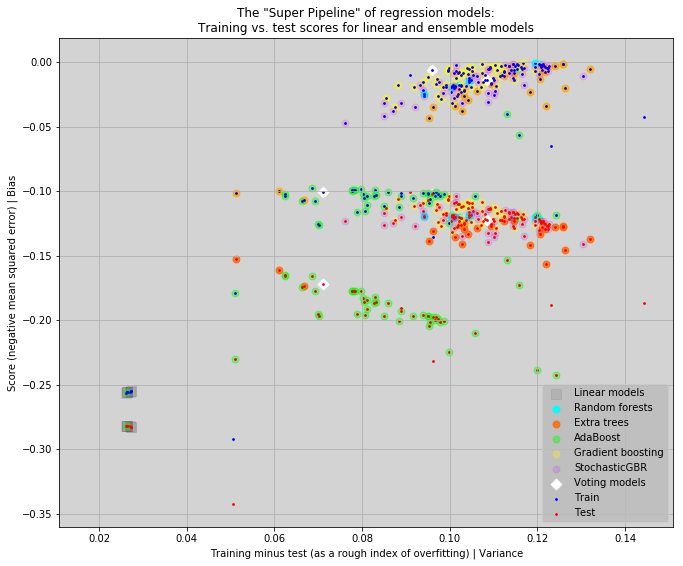

In [89]:
# We can visualize the Super Pipeline() by plotting training and test results
# Highlight families of models!

fig, ax = plt.subplots(figsize = (11, 9))
fig.set_facecolor("white")
ax.set_facecolor("lightgray")

# Highlight each class of models

highlight = 48
spot = 3

plt.scatter(super_overfit_frame.iloc[old_models]["train_minus_test"],
            super_overfit_frame.iloc[old_models]["mean_test_score"], color = "#00000011", s = highlight * 2.4,
            marker = "s", label = "Linear models")  # Black

plt.scatter(super_overfit_frame.iloc[random_forest_series]["train_minus_test"],
            super_overfit_frame.iloc[random_forest_series]["mean_test_score"], color = "#00ffffff", s = highlight,
            marker = "o", label = "Random forests")  # Cyan — Alpha jacked up because this is buried

plt.scatter(super_overfit_frame.iloc[extra_trees_series]["train_minus_test"],
            super_overfit_frame.iloc[extra_trees_series]["mean_test_score"], color = "#ff6600cc", s = highlight,
            marker = "o", label = "Extra trees")  # Orange

plt.scatter(super_overfit_frame.iloc[AdaBoost_series]["train_minus_test"],
            super_overfit_frame.iloc[AdaBoost_series]["mean_test_score"], color = "#00ff0066", s = highlight,
            marker = "o", label = "AdaBoost")  # Green

plt.scatter(super_overfit_frame.iloc[gbr_series]["train_minus_test"],
            super_overfit_frame.iloc[gbr_series]["mean_test_score"], color = "#ffff0044", s = highlight,
            marker = "o", label = "Gradient boosting")  # Yellow

plt.scatter(super_overfit_frame.iloc[sgbr_series]["train_minus_test"],
            super_overfit_frame.iloc[sgbr_series]["mean_test_score"], color = "#bb00ff22", s = highlight,
            marker = "o", label = "StochasticGBR")  # Magenta

plt.scatter(super_overfit_frame.iloc[voting_series]["train_minus_test"],
            super_overfit_frame.iloc[voting_series]["mean_test_score"], color = "#ffffffff", s = highlight * 1.2,
            marker = "D", label = "Voting models")  # White


plt.scatter(super_overfit_frame.iloc[old_models]["train_minus_test"],
            super_overfit_frame.iloc[old_models]["mean_train_score"], color = "#00000011", s = highlight * 2.4,
            marker = "s", label = None)  # Black

plt.scatter(super_overfit_frame.iloc[random_forest_series]["train_minus_test"],
            super_overfit_frame.iloc[random_forest_series]["mean_train_score"], color = "#00ffffff", s = highlight,
            marker = "o", label = None)  # Cyan — Alpha jacked up because this is buried

plt.scatter(super_overfit_frame.iloc[extra_trees_series]["train_minus_test"],
            super_overfit_frame.iloc[extra_trees_series]["mean_train_score"], color = "#ffaa00cc", s = highlight,
            marker = "o", label = None)  # Orange

plt.scatter(super_overfit_frame.iloc[AdaBoost_series]["train_minus_test"],
            super_overfit_frame.iloc[AdaBoost_series]["mean_train_score"], color = "#00ff0066", s = highlight,
            marker = "o", label = None)  # Green

plt.scatter(super_overfit_frame.iloc[gbr_series]["train_minus_test"],
            super_overfit_frame.iloc[gbr_series]["mean_train_score"], color = "#ffff0077", s = highlight,
            marker = "o", label = None)  # Yellow

plt.scatter(super_overfit_frame.iloc[sgbr_series]["train_minus_test"],
            super_overfit_frame.iloc[sgbr_series]["mean_train_score"], color = "#ff00dd22", s = highlight,
            marker = "o", label = None)  # Magenta

plt.scatter(super_overfit_frame.iloc[voting_series]["train_minus_test"],
            super_overfit_frame.iloc[voting_series]["mean_train_score"], color = "#ffffffff", s = highlight * 1.2,
            marker = "D", label = None)  # White



# plt.scatter(super_overfit_frame["train_minus_test"], super_overfit_frame["mean_train_score"], color = "#0044bbee", s = 24, label = "Train")
plt.scatter(super_overfit_frame["train_minus_test"], super_overfit_frame["mean_train_score"], color = "blue", s = spot, label = "Train")

# plt.scatter(super_overfit_frame["train_minus_test"], super_overfit_frame["mean_test_score"], color = "#ee2200ee", s = 24, label = "Test")
plt.scatter(super_overfit_frame["train_minus_test"], super_overfit_frame["mean_test_score"], color = "red", s = spot, label = "Test")

# plt.xlim(0, 0.036)
plt.grid()
plt.title('The "Super Pipeline" of regression models:\nTraining vs. test scores for linear and ensemble models')
plt.xlabel("Training minus test (as a rough index of overfitting) | Variance")
plt.ylabel("Score (negative mean squared error) | Bias")
plt.legend(loc = "lower right", facecolor = "#bbbbbbbb")
plt.savefig("super_pipe_train_minus_test.png")
plt.savefig("super_pipe_train_minus_test.pdf")

In [90]:
# This is an *EXCEPTIONALLY IMPORTANT* block of code
# (Re)define each of the regularized models in light of the hyperparamters reported by GridSearchCV and AIC/BIC

ITERATIONS = 1000 # Restoring the default value in lieu of 20000 or more. No need; we've removed learning curves.

ridge_reg = Ridge(alpha = ridge_alpha, solver = "cholesky")
lasso_reg = Lasso(alpha = lasso_alpha, max_iter = ITERATIONS)
lasso_reg_aic = Lasso(alpha = aic_alpha, max_iter = ITERATIONS)
lasso_reg_bic = Lasso(alpha = bic_alpha, max_iter = ITERATIONS)
elastic_net = ElasticNet(alpha = elastic_net_alpha, l1_ratio = elastic_net_l1_ratio, max_iter = ITERATIONS)
elastic_net2 = ElasticNet(alpha = elastic_net_alpha2, l1_ratio = elastic_net_l1_ratio2, max_iter = ITERATIONS)

regression_models = [[lin_reg, "Linear regression", "lin_reg"], [ridge_reg, "Ridge regression", "ridge_reg"], 
                     [lasso_reg, "Lasso regression", "lasso_reg"],
                     [lasso_reg_aic, "Lasso/AIC", "lasso_reg_aic"],
                     [lasso_reg_bic, "Lasso/BIC", "lasso_reg_bic"],
                     [elastic_net, "ElasticNet", "elastic_net"],
                     [elastic_net2, "ElasticNet2", "elastic_net2"],
                     [tree, "Decision trees", "tree"],
                     [bag_tree, "Bagging regression", "bag_tree"],
                     [forest, "Random forest", "forest"],
                     [extra_trees, "Extra trees", "extra_trees"],
                     [AdaBoost, "AdaBoost", "AdaBoost"],
                     [gbr, "Gradient boosting", "gbr"],
                     [sgbr, "Stochastic GBR", "sgbr"],
                     [voting, "Voting: New models", "voting"],
                     [voting2, "Voting: All models", "voting2"],
                     [Final_Five, "Voting: Ensembles", "Final_Five"]]

hyperparameters = {ridge_reg: ridge_alpha, lasso_reg: lasso_alpha, lasso_reg_aic: aic_alpha,
                   lasso_reg_bic: bic_alpha, elastic_net: [elastic_net_alpha, elastic_net_l1_ratio],
                   elastic_net2: [elastic_net_alpha2, elastic_net_l1_ratio2], tree: tree_depth,
                   forest: [forest_depth, forest_features],
                   extra_trees: [extra_trees_depth, extra_trees_features],
                   AdaBoost: [AdaBoost_depth, AdaBoost_learning_rate, AdaBoost_estimators],
                   gbr: [gbr_depth, gbr_learning_rate, gbr_estimators],
                   sgbr: [sgbr_depth, sgbr_learning_rate, sgbr_estimators, sgbr_subsample]}

# Sanity check: Echo a message indicating successful completion of this step
# Report each of the models and its appopriate hyperparameter(s)

print("*** Specification of optimized regression models ***\n")
print("The linear regression model has already been defined.")
print("Regularized models ridge, lasso, and ElasticNet have been defined, according to optimized hyperparameters.\n")

# print(hyperparameters["lasso_reg"])

print("{:>18}\t{:>8}\t{:>5}\t{:>8}\t{:>8}\t{:>8}\t{:>5}\t{:>9}".format("Model", "Alpha", "l1", "Depth", "Features", "Learning", "Est.", "Subsample"))
for reg_model, model_label, file_name in regression_models:
    print("{:>18}\t".format(model_label), end = "")
    if reg_model in (ridge_reg, lasso_reg, lasso_reg_aic, lasso_reg_bic):
        print("{:8.6f}\t".format(hyperparameters[reg_model]), end = "")
    elif reg_model == elastic_net or reg_model == elastic_net2:
        print("{:8.6f}\t{:5.2f}".format(hyperparameters[reg_model][0], hyperparameters[reg_model][1]), end = "")
    elif reg_model == tree:
        print("{:>8}\t{:>5}\t{:8d}".format("", "", hyperparameters[reg_model]), end = "")
    elif reg_model in (forest, extra_trees):
        print("{:>8}\t{:>5}\t{:8}\t{:8d}".format("", "", hyperparameters[reg_model][0], hyperparameters[reg_model][1]), end = "")
    elif reg_model in (AdaBoost, gbr):
        print("{:>8}\t{:>5}\t{:8d}\t{:>8}\t{:8.2f}\t{:5d}".format("", "", hyperparameters[reg_model][0], "", hyperparameters[reg_model][1], hyperparameters[reg_model][2]), end = "")
    elif reg_model == sgbr:
        print("{:>8}\t{:>5}\t{:8d}\t{:>8}\t{:8.2f}\t{:5d}\t{:9.2f}".format("", "", hyperparameters[reg_model][0], "", hyperparameters[reg_model][1], hyperparameters[reg_model][2], hyperparameters[reg_model][3]), end = "")
    print("")


*** Specification of optimized regression models ***

The linear regression model has already been defined.
Regularized models ridge, lasso, and ElasticNet have been defined, according to optimized hyperparameters.

             Model	   Alpha	   l1	   Depth	Features	Learning	 Est.	Subsample
 Linear regression	
  Ridge regression	2.140000	
  Lasso regression	0.002900	
         Lasso/AIC	0.000106	
         Lasso/BIC	0.004027	
        ElasticNet	0.002907	 0.99
       ElasticNet2	0.004412	 0.62
    Decision trees	        	     	       4
Bagging regression	
     Random forest	        	     	      12	      11
       Extra trees	        	     	      10	       5
          AdaBoost	        	     	       5	        	    0.16	   20
 Gradient boosting	        	     	       4	        	    0.09	  113
    Stochastic GBR	        	     	       5	        	    0.08	   84	     0.65
Voting: New models	
Voting: All models	
 Voting: Ensembles	


In [91]:
# Now that we have well-defined models, we can feed them into a defined function for Kfold cross-validation

np.set_printoptions(precision = 6)
CV_FOLDS = 5

def crossval_scoring(model, label):
    scores = cross_val_score(model, model_features, model_target, scoring = "neg_mean_squared_error", cv = CV_FOLDS)
    scores = np.sqrt(-scores)
    print("{:>18}\t{:10.6f}\t{:8.6f}\t{}".format(label, scores.mean(), scores.std(), scores))
    
print("\t\t\t*** {:d}-fold cross-validation of {:d} regression models ***\n".format(CV_FOLDS, len(regression_models)))
print("{:>18}\t{:>10}\t{:>8}\t{:>25}".format("Model", "Neg. MSE", "Std Dev", "Scores"))
for cv_model, model_label, file_name in regression_models:
    crossval_scoring(cv_model, model_label)

np.set_printoptions(precision = None)

			*** 5-fold cross-validation of 17 regression models ***

             Model	  Neg. MSE	 Std Dev	                   Scores
 Linear regression	  0.625297	0.188195	[0.376263 0.554299 0.640287 0.955692 0.599943]
  Ridge regression	  0.621272	0.189246	[0.371865 0.54958  0.63851  0.953845 0.59256 ]
  Lasso regression	  0.620806	0.194325	[0.369089 0.544866 0.636706 0.964879 0.588488]
         Lasso/AIC	  0.625111	0.188412	[0.376008 0.553908 0.640114 0.956008 0.599518]
         Lasso/BIC	  0.619653	0.196726	[0.366836 0.542081 0.636198 0.968992 0.584161]
        ElasticNet	  0.620814	0.194282	[0.369118 0.544906 0.636714 0.964792 0.58854 ]
       ElasticNet2	  0.619912	0.194200	[0.368218 0.544148 0.636507 0.963604 0.587083]
    Decision trees	  0.603010	0.124040	[0.368702 0.653647 0.60095  0.729142 0.662607]
Bagging regression	  0.505073	0.146956	[0.319513 0.399707 0.570661 0.745717 0.489766]
     Random forest	  0.475660	0.141515	[0.303271 0.391116 0.5003   0.725372 0.458242]
       Extra tr

We come finally to a direct evaluation of prediction error through comparison of root mean-squared error (RMSE) and r². Although we have gathered insight into all models through other forms of cross-validation, this is _the_ comparative evaluation specifically requested by Assignment 4.

In [92]:
# Compare the RMSE and r² for the linear regression, ridge, lasso (3x), and ElasticNet (2x) models
# Start by defining a function to return each score by model
# Then print it in a pseudo-report format
# We could create a pandas DataFrame, but that adds complications and diminishes the simplicity of this information

def rmse_r2(model):
    model.fit(features_train, target_train)
    benchmark = target_test
    predictions = model.predict(features_test)
    mse = mean_squared_error(benchmark, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(benchmark, predictions)
    return (rmse, r2)

winning_model = lin_reg
winning_label = "Linear regression"
winning_rmse = rmse_r2(lin_reg)[0]

print("*** Model scoring: Performance according to RMSE and r² ***\n")
print("{:>20}\t{:>10}\t{:>10}".format("Model", "RMSE", "r²"))
for scoring_model, model_label, file_name in regression_models:
    this_rmse = rmse_r2(scoring_model)[0]
    this_r2 = rmse_r2(scoring_model)[1]
    print("{:>20}\t{:>10.6f}\t{:>10.6f}".format(model_label, this_rmse, this_r2))
    if this_rmse < winning_rmse:
        winning_model = scoring_model
        winning_rmse = this_rmse
        winning_label = model_label

print("\n{} is the best-performing model, with a winning (lowest) RMSE score of {:.6f}.".format(winning_label, winning_rmse))
if winning_model != lin_reg:
    print("This represents a reduction in RMSE of {:.6f} relative to linear regression.".format(rmse_r2(lin_reg)[0] - winning_rmse))
else:
    print("No form of regularization evaluated here improves upon the performance of linear regression.")
if winning_model != tree and rmse_r2(winning_model)[0] < rmse_r2(tree)[0]:
    print("This represents a reduction in RMSE of {:.6f} relative to decision trees.".format(rmse_r2(tree)[0] - winning_rmse))

*** Model scoring: Performance according to RMSE and r² ***

               Model	      RMSE	        r²
   Linear regression	  0.539679	  0.752015
    Ridge regression	  0.539794	  0.751909
    Lasso regression	  0.540633	  0.751137
           Lasso/AIC	  0.539691	  0.752003
           Lasso/BIC	  0.541308	  0.750516
          ElasticNet	  0.540624	  0.751145
         ElasticNet2	  0.540691	  0.751084
      Decision trees	  0.411958	  0.855502
  Bagging regression	  0.355178	  0.892589
       Random forest	  0.322622	  0.911378
         Extra trees	  0.331106	  0.906656
            AdaBoost	  0.317018	  0.914430
   Gradient boosting	  0.307200	  0.919648
      Stochastic GBR	  0.299089	  0.923835
  Voting: New models	  0.312762	  0.916712
  Voting: All models	  0.393734	  0.868004
   Voting: Ensembles	  0.297895	  0.924442

Voting: Ensembles is the best-performing model, with a winning (lowest) RMSE score of 0.297895.
This represents a reduction in RMSE of 0.241784 relative to linear r

Stage 6: Use scatterplots to visualize the relationship between actual Boston housing data and predictions by each of these regression models. We will perform two sets of scatterplots: one showing the difference between training and test sets (as a final 1-fold cross-validation), and other showing predictions by each of our models, projected across the entire data set.

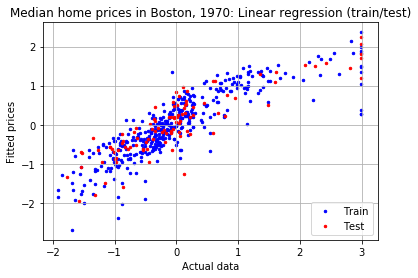

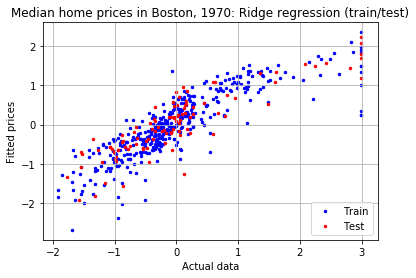

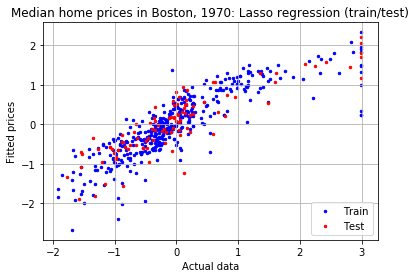

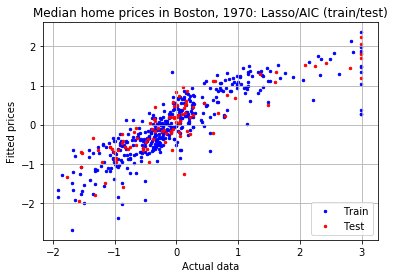

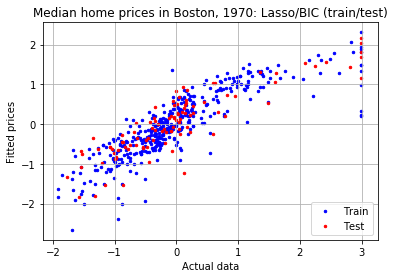

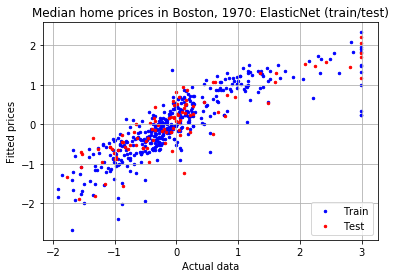

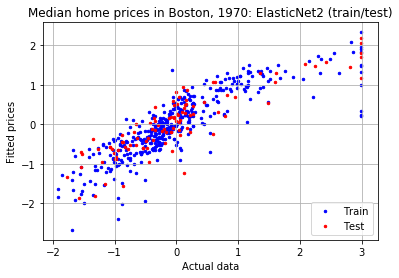

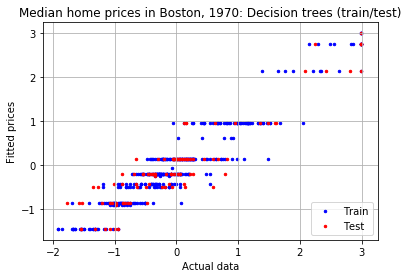

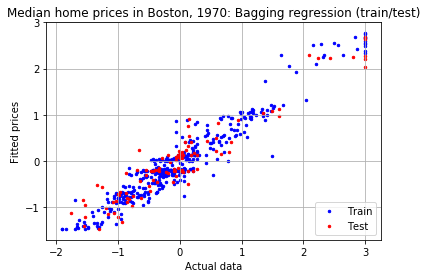

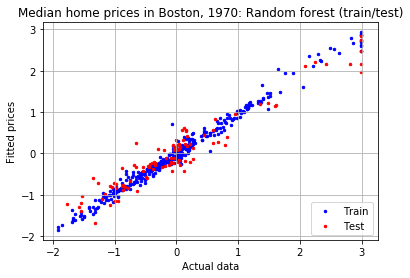

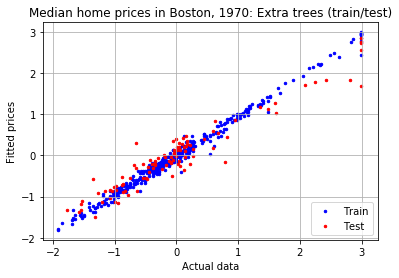

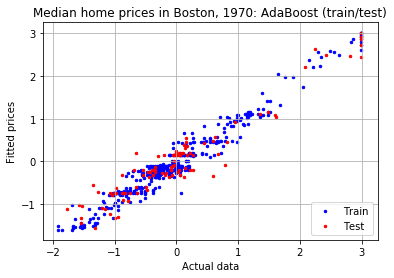

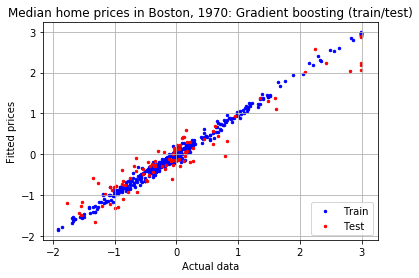

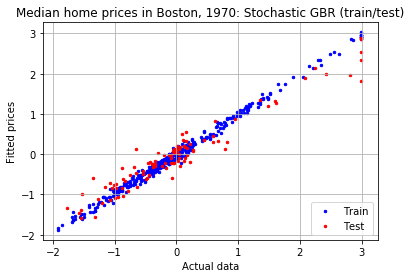

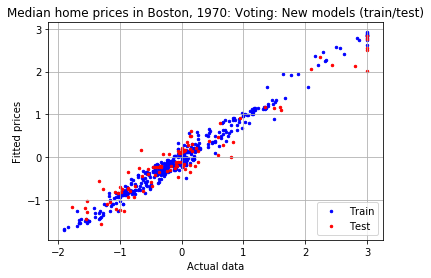

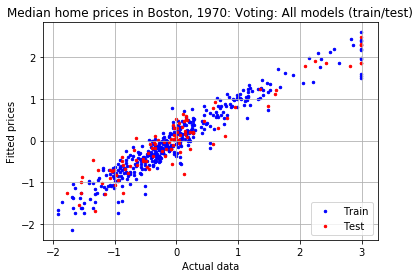

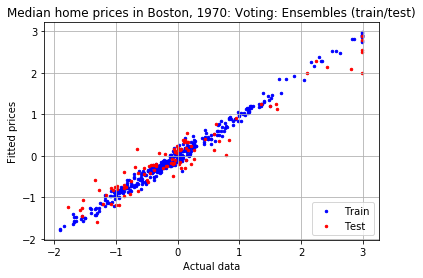

In [93]:
# Two-color plot of train and test sets
# It's worth recalling the names of the training and test sets drawn from model_data
# features_train, target_train, features_test, target_test

def double_scatterplot_by_model(model, trainfeatures, traintarget, testfeatures, testtarget,
                                graph_title, file_name = "default"):
    model.fit(trainfeatures, traintarget)
    train_predictions = model.predict(trainfeatures)
    plt.figure()
    plt.scatter(traintarget, train_predictions, s = 6, color = "blue", label = "Train")
    test_predictions = model.predict(testfeatures)
    plt.scatter(testtarget, test_predictions, s = 6, color = "red", label = "Test")
    plt.grid()
    plt.title("Median home prices in Boston, 1970: " + graph_title)
    plt.xlabel("Actual data")
    plt.ylabel("Fitted prices")
    plt.legend(loc = "lower right")
    file_name += "_scatter"
    plt.savefig(file_name + ".png")
    plt.savefig(file_name + ".pdf")
    plt.show()


for scatter_model, model_label, file_name in regression_models:
    double_scatterplot_by_model(scatter_model, features_train, target_train, features_test, target_test,
                                model_label + " (train/test)", file_name + "_train_test")

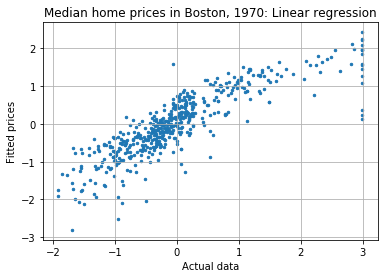

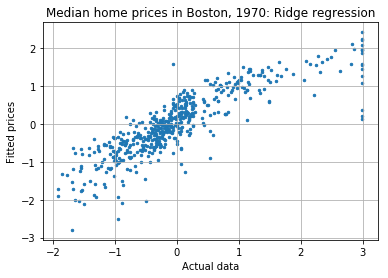

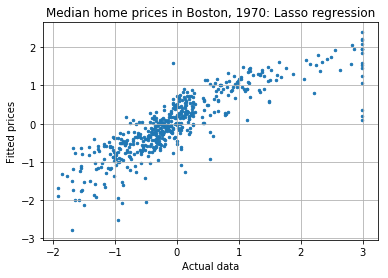

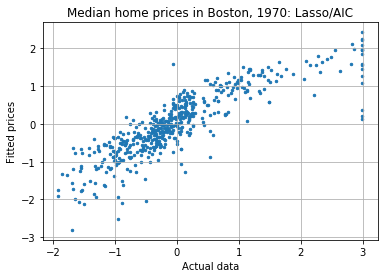

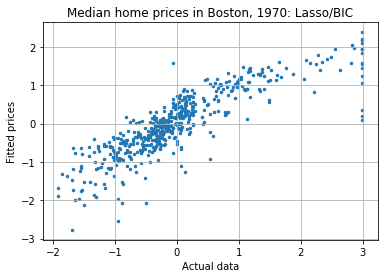

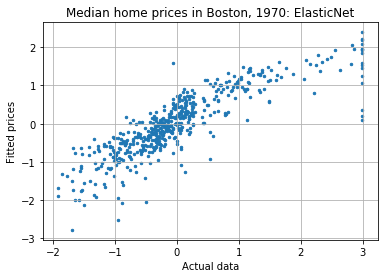

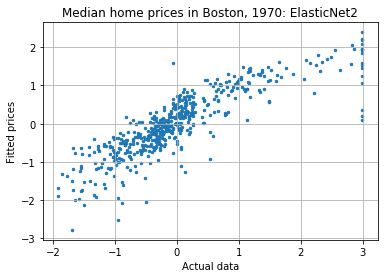

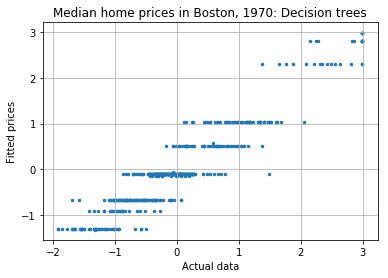

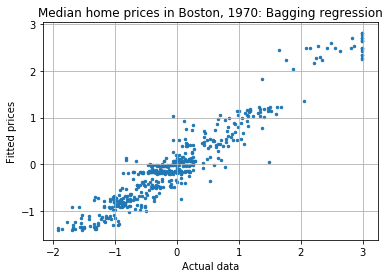

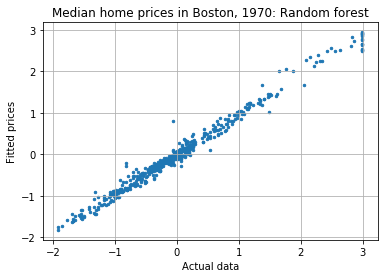

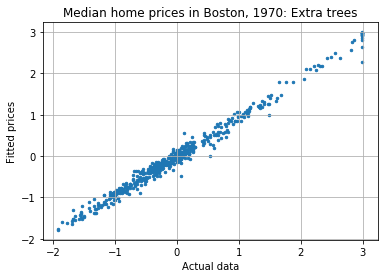

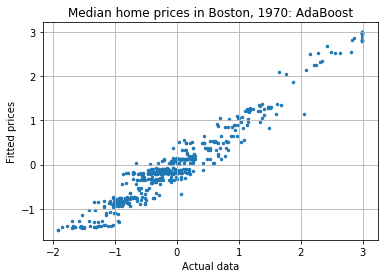

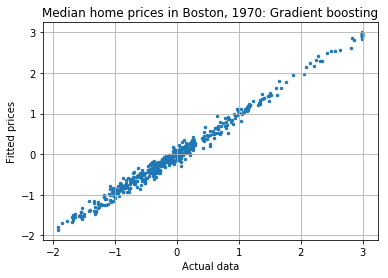

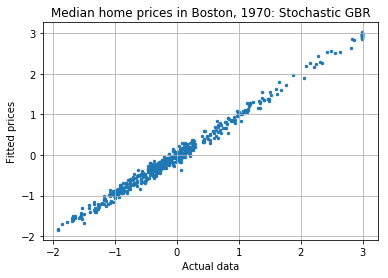

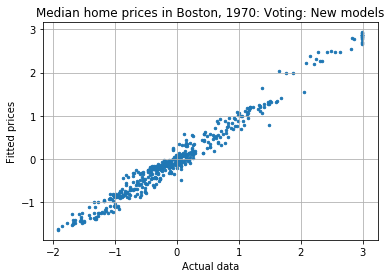

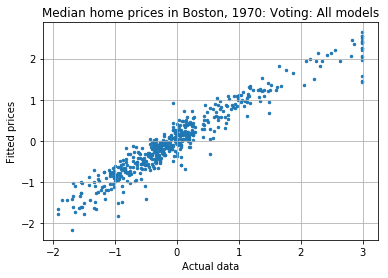

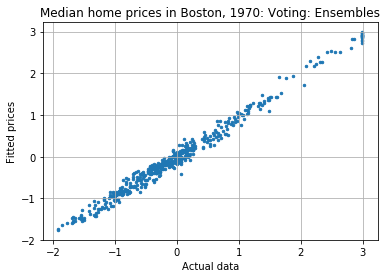

In [94]:
# Consolidated scatterplots

def scatterplot_by_model(model, features, target, graph_title, file_name = "default"):
    model.fit(features, target)
    model_predictions = model.predict(features)
    plt.figure()
    plt.scatter(target, model_predictions, s = 6)
    plt.grid()
    plt.title("Median home prices in Boston, 1970: " + graph_title)
    plt.xlabel("Actual data")
    plt.ylabel("Fitted prices")
    file_name += "_scatter"
    plt.savefig(file_name + ".png")
    plt.savefig(file_name + ".pdf")

for scatter_model, model_label, file_name in regression_models:
    scatterplot_by_model(scatter_model, model_features, model_target, model_label, file_name)

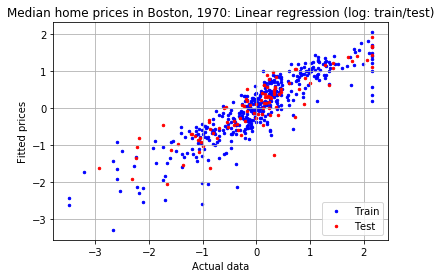

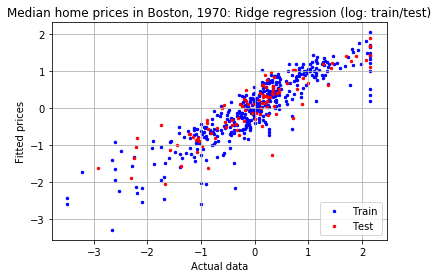

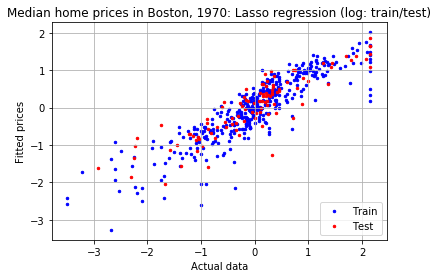

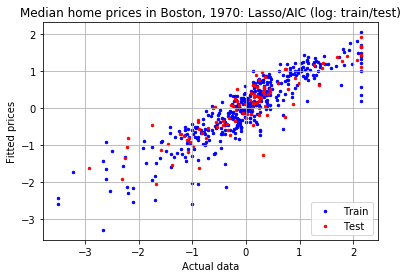

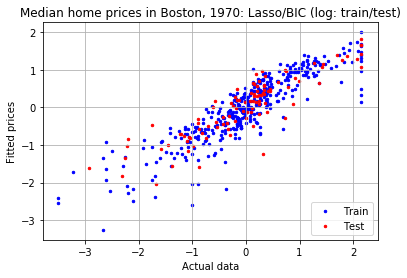

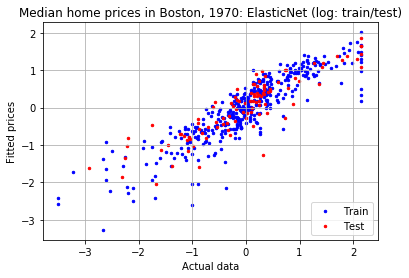

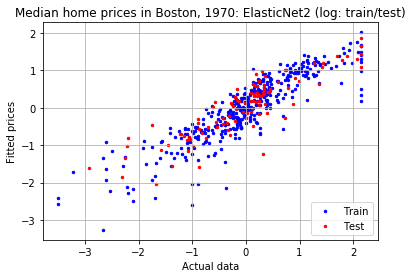

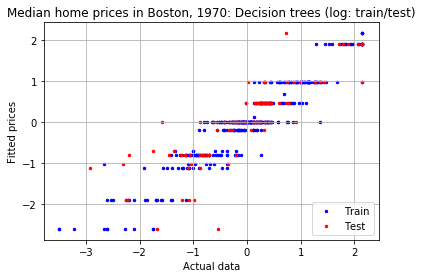

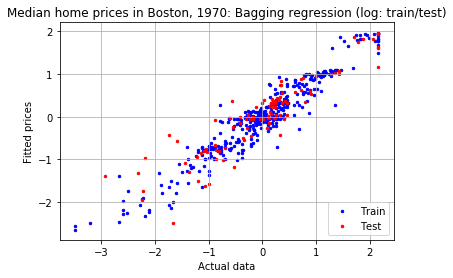

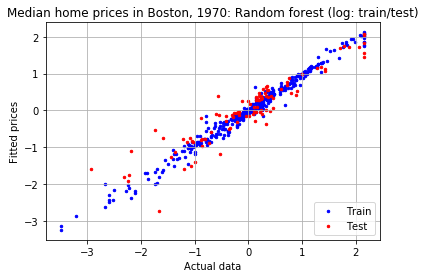

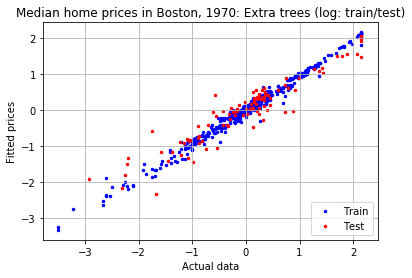

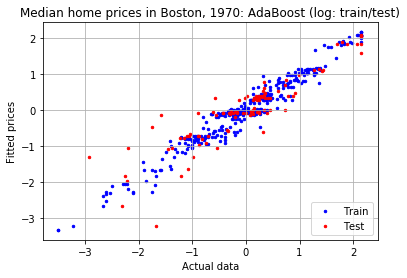

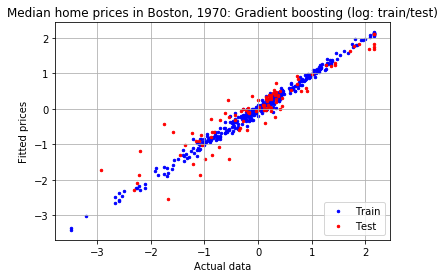

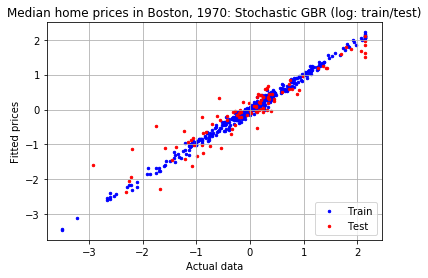

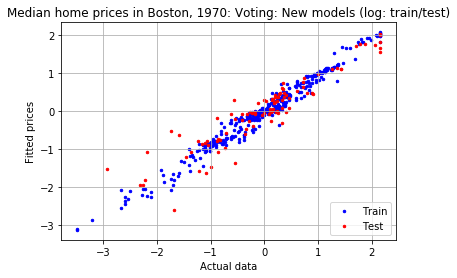

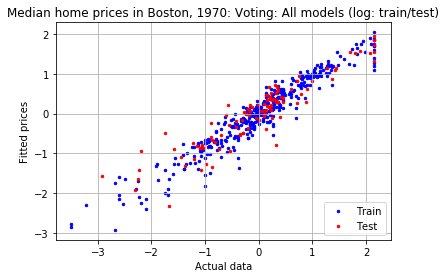

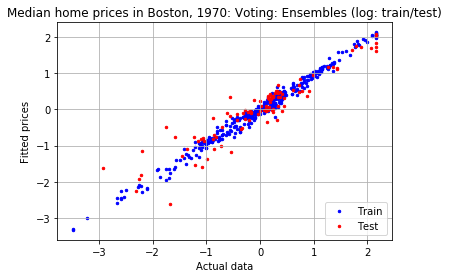

In [95]:
# Strictly for fun, let's see what the scatterplots of the log-transformed data would look like
# WARNING! This will change the intercept and coefficients of the models
# Do this only after we are satisfied with everything else

log_features_train, log_features_test, log_target_train, log_target_test = train_test_split(log_model_features, log_model_target,
                                                                            test_size = 0.2,
                                                                            random_state = RANDOM_SEED)

for scatter_model, model_label, file_name in regression_models:
    double_scatterplot_by_model(scatter_model, log_features_train, log_target_train, log_features_test, log_target_test,
                                model_label + " (log: train/test)", file_name + "_log_train_test")

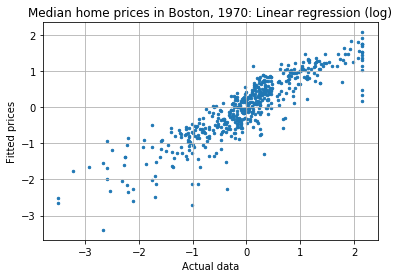

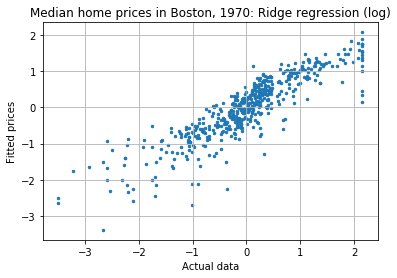

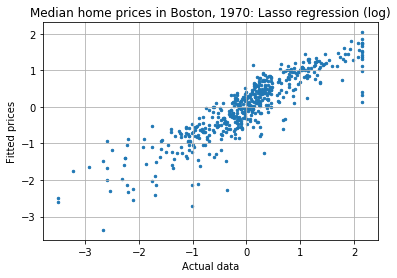

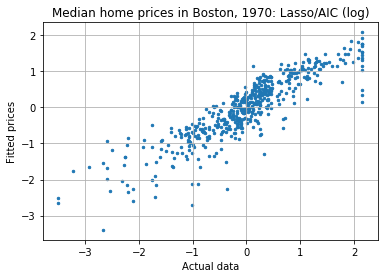

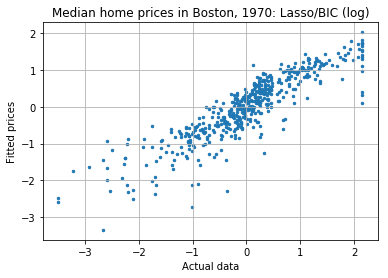

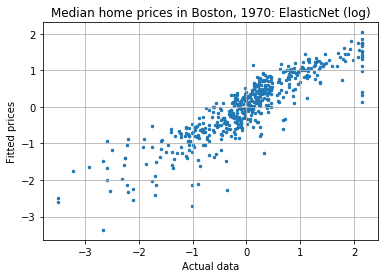

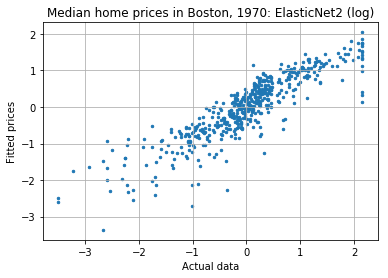

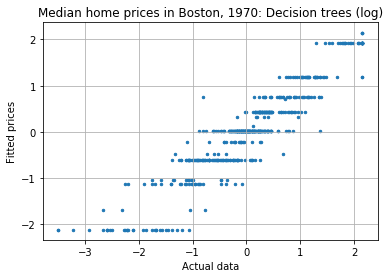

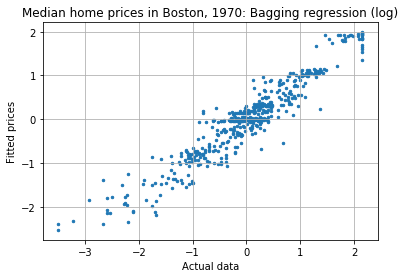

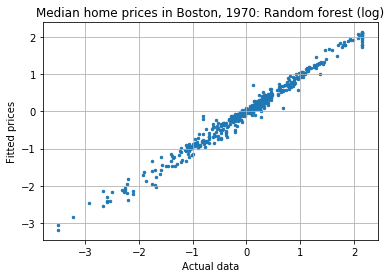

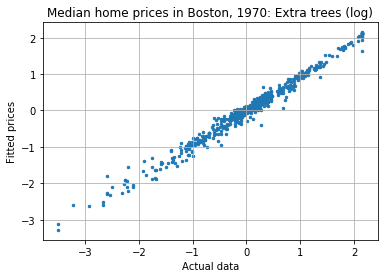

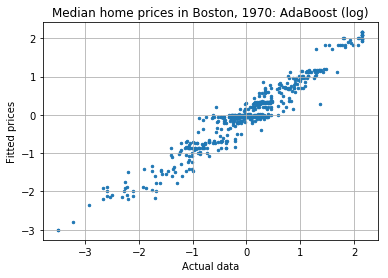

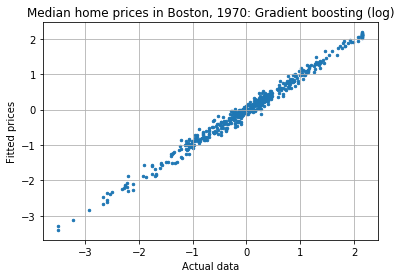

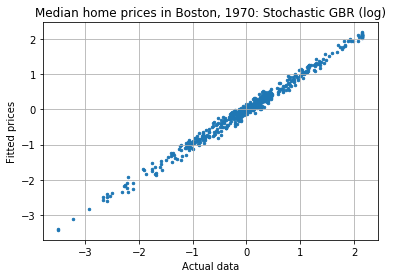

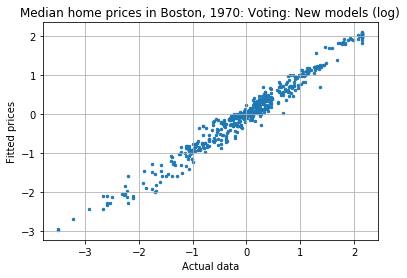

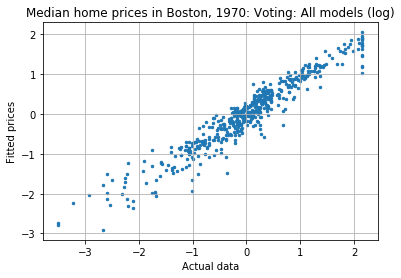

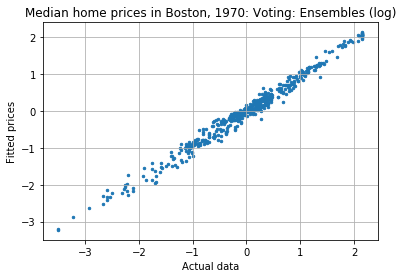

In [96]:
# Consolidated log-transformed model scatterplots

for scatter_model, model_label, file_name in regression_models:
    scatterplot_by_model(scatter_model, log_model_features, log_model_target, model_label + " (log)", file_name + "_log")

In [97]:
# Reproduce the final report of RMSE and r² — our acid-test performance criteria — on the log-transformed data

def log_rmse_r2(model):
    benchmark = log_model_target
    predictions = model.predict(log_model_features)
    mse = mean_squared_error(benchmark, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(benchmark, predictions)
    return (rmse, r2)

   
winning_model = lin_reg
winning_label = "Linear regression"
winning_rmse = log_rmse_r2(lin_reg)[0]

print("*** Log-transformed model scoring: Performance according to RMSE and r² ***\n")
print("{:>20}\t{:>10}\t{:>10}".format("Model", "RMSE", "r²"))
for scoring_model, model_label, file_name in regression_models:
    this_rmse = log_rmse_r2(scoring_model)[0]
    this_r2 = log_rmse_r2(scoring_model)[1]
    print("{:>20}\t{:>10.6f}\t{:>10.6f}".format(model_label, this_rmse, this_r2))
    if this_rmse < winning_rmse:
        winning_model = scoring_model
        winning_rmse = this_rmse
        winning_label = model_label

print("\n{} is the best-performing model, with a winning (lowest) RMSE score of {:.6f}.".format(winning_label, winning_rmse))
if winning_model != lin_reg:
    print("This represents a reduction in RMSE of {:.6f} relative to linear regression.".format(log_rmse_r2(lin_reg)[0] - winning_rmse))
else:
    print("No form of regularization evaluated here improves upon the performance of linear regression.")
if winning_model != tree and rmse_r2(winning_model)[0] < log_rmse_r2(tree)[0]:
    print("This represents a reduction in RMSE of {:.6f} relative to decision trees.".format(log_rmse_r2(tree)[0] - winning_rmse))

*** Log-transformed model scoring: Performance according to RMSE and r² ***

               Model	      RMSE	        r²
   Linear regression	  0.459324	  0.789021
    Ridge regression	  0.459394	  0.788957
    Lasso regression	  0.459987	  0.788412
           Lasso/AIC	  0.459325	  0.789020
           Lasso/BIC	  0.460601	  0.787847
          ElasticNet	  0.459980	  0.788419
         ElasticNet2	  0.460053	  0.788351
      Decision trees	  0.378221	  0.856949
  Bagging regression	  0.316532	  0.899807
       Random forest	  0.138726	  0.980755
         Extra trees	  0.151313	  0.977104
            AdaBoost	  0.250901	  0.937048
   Gradient boosting	  0.113231	  0.987179
      Stochastic GBR	  0.104891	  0.988998
  Voting: New models	  0.185570	  0.965564
  Voting: All models	  0.296464	  0.912109
   Voting: Ensembles	  0.138178	  0.980907

Stochastic GBR is the best-performing model, with a winning (lowest) RMSE score of 0.104891.
This represents a reduction in RMSE of 0.354433 relativ

This final frolic-and-detour into the log-transformed data shows that the supposed invulnerability of decision trees to scaling and other monotonic transformations of data may not apply to ensemble methods based on decision trees. We did not carefully recalibrate our models on log-transformed data. Instead, we applied hyperparameters so painfully obtained from the primary data set directly to log-transformed data. These models may not perform optimally on log-transformed data. Indeed, even a glance suggests that some models' success on log-transformed data may be illusory. There appears to be more overfitting, which we must expect if we have not properly fine-tuned these models.

All that said, our primary RMSE and r² are very impressive. We intend to recommend these new methods to management as a powerful tool for predicting real estate prices.